# H2 Laserspektroskopie

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.signal import find_peaks_cwt

In [137]:
pd.set_option("display.precision", 8)

### Absorptionsspektroskopie

In [138]:
abs_df = pd.read_csv("Absorption.csv")
abs_df.head()

,x-axis,1,2,3
0,second,Volt,Volt,Volt
1,-9.960000E-03,NaN,NaN,NaN
2,-9.955000E-03,NaN,NaN,NaN
3,-9.950000E-03,+6.984945E-03,-7.460402250E+00,+26.673366763E+00
4,-9.945000E-03,+703.538E-06,-7.548341949E+00,+26.673366763E+00


In [139]:
abs_df.columns = ["Zeit (s)", "Referenz (V)", "Piezo (V)", "Strahl (V)"]
abs_df.drop([0,1,2], inplace=True)
abs_df.reset_index(drop=True, inplace=True)
abs_df = abs_df.astype("float")
abs_df.head()

,Zeit (s),Referenz (V),Piezo (V),Strahl (V)
0,-0.009950,0.00698495,-7.46040225,26.67336676
1,-0.009945,0.00070354,-7.54834195,26.67336676
2,-0.009940,0.00723620,-7.84984949,26.67336676
3,-0.009935,0.00698495,-7.57346758,26.67336676
4,-0.009930,0.00698495,-7.86241230,26.75376877


Text(0.5, 1.0, 'Absorptionsspektroskopie (ignorieren)')

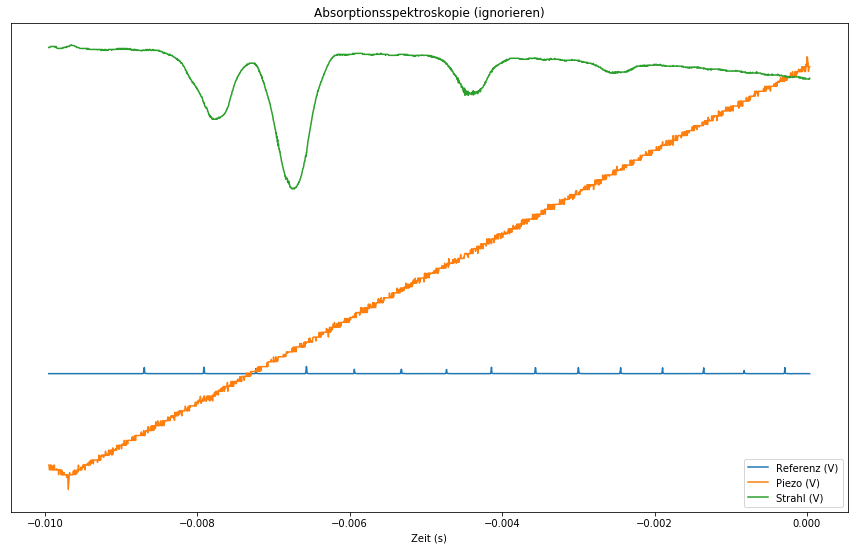

In [140]:
abs_df.plot(x="Zeit (s)", figsize=(15,9))

plt.xlabel("Zeit (s)")
plt.yticks([])
plt.title("Absorptionsspektroskopie (ignorieren)")

### Sättigungsspektroskopie

In [141]:
sat_df = pd.read_csv("Sättigung.csv")
sat_df.head()

,x-axis,1,2,3
0,second,Volt,Volt,Volt
1,-5.0000000E-03,+31.1055481E-03,-8.2644223571E+00,+44.6614322960E+00
2,-4.9998400E-03,+31.1055481E-03,-7.8624123037E+00,+44.8624373227E+00
3,-4.9996800E-03,+31.1055481E-03,-8.2644223571E+00,+44.6614322960E+00
4,-4.9995200E-03,+31.1055481E-03,-8.2644223571E+00,+44.8624373227E+00


In [142]:
sat_df.columns = ["Zeit (s)", "Referenz (V)", "Piezo (V)", "Strahl (V)"]
sat_df.drop([0], inplace=True)
sat_df.reset_index(drop=True, inplace=True)
sat_df = sat_df.astype("float")
sat_df.head()

,Zeit (s),Referenz (V),Piezo (V),Strahl (V)
0,-0.00500000,0.03110555,-8.26442236,44.66143230
1,-0.00499984,0.03110555,-7.86241230,44.86243732
2,-0.00499968,0.03110555,-8.26442236,44.66143230
3,-0.00499952,0.03110555,-8.26442236,44.86243732
4,-0.00499936,0.03110555,-8.26442236,44.86243732


([], <a list of 0 Text yticklabel objects>)

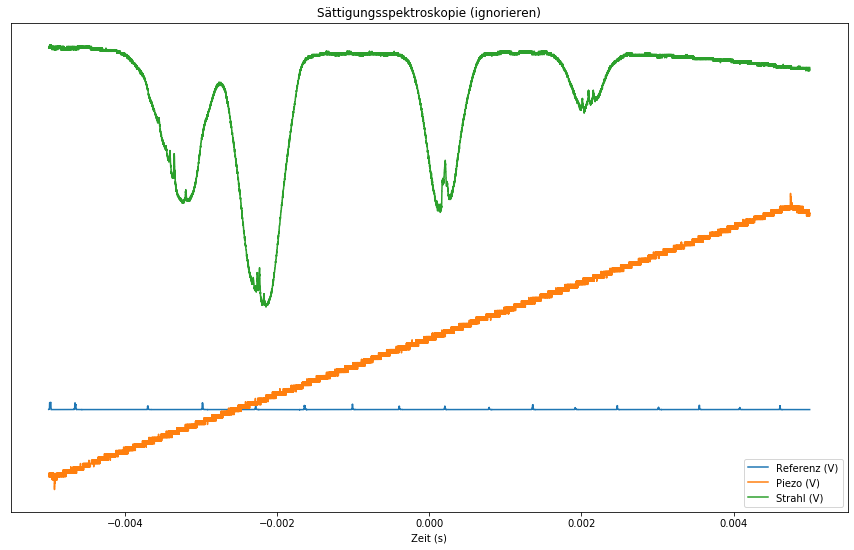

In [143]:
sat_df.plot(x="Zeit (s)", figsize=(15,9))
plt.title("Sättigungsspektroskopie (ignorieren)")
plt.yticks([])

[  171  2158  8160 12651 17009 20996 24951 28770 32535 36177 39762 43247
 46707 50087 53452 56767 60053]
freier Spektralbereich: 0.75 GHz
zeitlicher Abstand zwischen 2 Peaks: 0.000616752 s
1 Sekunde entspricht: 1216.0479414740446 GHz


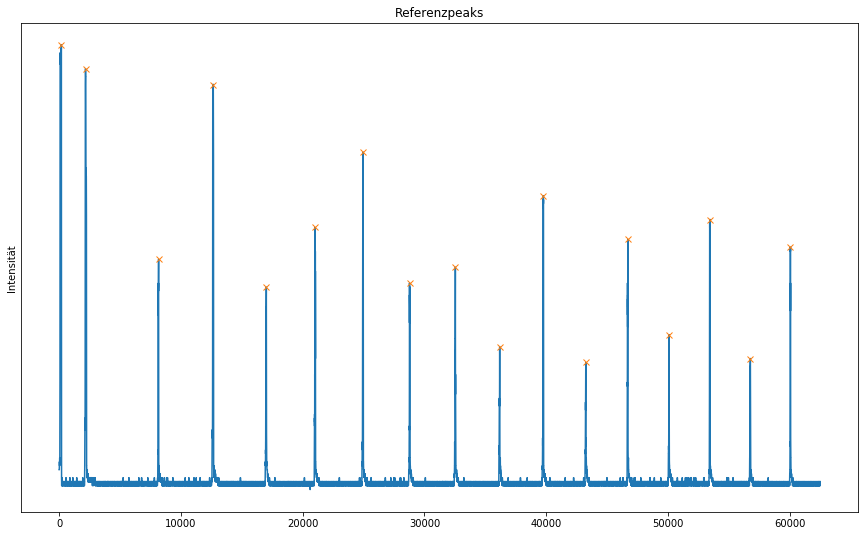

In [144]:
ref14 = sat_df["Referenz (V)"]
refpeaks14, _ = find_peaks(ref14, height=0.2, distance=1000)
plt.figure(figsize=(15,9))
plt.plot(ref14)
plt.plot(refpeaks14, ref14[refpeaks14], "x")
plt.title("Referenzpeaks")
plt.ylabel("Intensität")
plt.yticks([])
print(refpeaks14)

# vergangene Zeit zwischen zwei Maxima
delta_t14 = (abs(sat_df.iloc[refpeaks14[12],0]) + abs(sat_df.iloc[refpeaks14[2],0]))/10

# Skala berechnen: freier Spektralbereich ny=c/4d
ny_fsr = 3*10**8/(4*0.1)/(10**9) #in GHz
print("freier Spektralbereich:", ny_fsr, "GHz")
print("zeitlicher Abstand zwischen 2 Peaks:", delta_t14, "s")

# Abstand der Zeit entspricht Abstand der Frequenzen: delta_t14 entsprechen 0,75 GHz
print("1 Sekunde entspricht:", ny_fsr/delta_t14, "GHz")

In [145]:
sat_skal_df = sat_df.copy()
sat_skal_df.rename(columns= {"Zeit (s)": "Frequenz (GHz)"}, inplace=True)
sat_skal_df[["Frequenz (GHz)"]] = sat_skal_df[["Frequenz (GHz)"]]*ny_fsr/delta_t14
sat_skal_df

,Frequenz (GHz),Referenz (V),Piezo (V),Strahl (V)
0,-6.08023971,0.03110555,-8.26442236,44.66143230
1,-6.08004514,0.03110555,-7.86241230,44.86243732
2,-6.07985057,0.03110555,-8.26442236,44.66143230
3,-6.07965600,0.03110555,-8.26442236,44.86243732
4,-6.07946144,0.03110555,-8.26442236,44.86243732
...,...,...,...,...
62495,6.07926687,0.00698495,24.29839197,42.04836695
62496,6.07946144,-0.00105526,24.29839197,42.04836695
62497,6.07965600,0.00698495,24.29839197,42.04836695
62498,6.07985057,0.00698495,24.29839197,42.04836695


Text(0, 0.5, 'Intensität (willkürliche Einheit)')

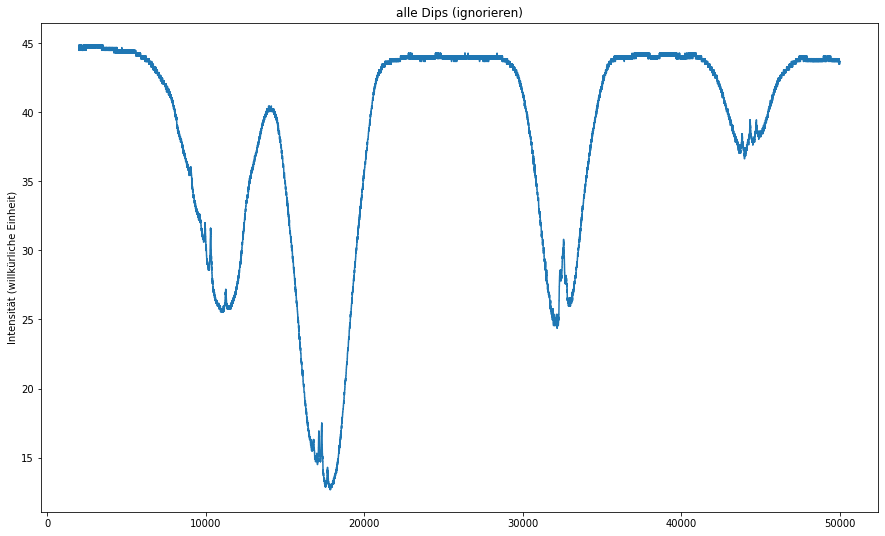

In [146]:
plt.figure(figsize=(15,9))
sat_skal_df["Strahl (V)"].iloc[2000:50000].plot()
plt.title("alle Dips (ignorieren)")
plt.ylabel("Intensität (willkürliche Einheit)")

([], <a list of 0 Text yticklabel objects>)

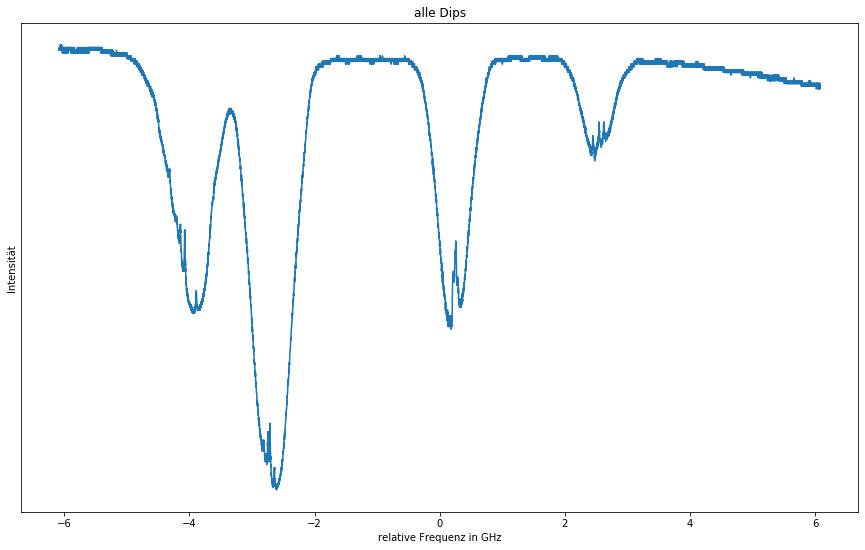

In [147]:
sat_skal_df.plot(x="Frequenz (GHz)", y="Strahl (V)", figsize=(15,9), legend=None)
plt.title("alle Dips")
plt.xlabel("relative Frequenz in GHz")
plt.ylabel("Intensität")
plt.yticks([])

In [148]:
x14 = sat_skal_df["Frequenz (GHz)"].iloc[2000:50000]
y14 = sat_skal_df["Strahl (V)"].iloc[2000:50000]

In [149]:
# Definitionen der Fitfunktionen

def gauss(omega, c, I0g, omega0g, delta):
    return c + I0g * np.exp(-((omega-omega0g)/(delta/np.sqrt(4*np.log(2))))**2)

def lorentz(omega, I0, omega0, gamma):
    return I0/(2*np.pi) * gamma/((omega-omega0)**2 + (gamma/2)**2)

def lorentzS(omega, I0, omega0, gamma, S):
    return I0/(2*np.pi) * gamma/((omega-omega0)**2 + (gamma/2)**2*(1+S))


# Definitionen der Dipfunktionen

def gauss4(x, c1, I01, omega01, delta1, c2, I02, omega02, delta2, c3, I03, omega03, delta3, c4, I04, omega04, delta4):
    return gauss(x, c1, I01, omega01, delta1) + gauss(x, c2, I02, omega02, delta2) + gauss(x, c3, I03, omega03, delta3) + gauss(x, c4, I04, omega04, delta4)

def dip3S(x, c, I0g, omega0g, delta, I01, omega01, gamma1, S1, I02, omega02, gamma2, S2, I03, omega03, gamma3, S3):
    return gauss(x, c, I0g, omega0g, delta) + lorentzS(x, I01, omega01, gamma1, S1) + lorentzS(x, I02, omega02, gamma2, S2) + lorentzS(x, I03, omega03, gamma3, S3)

def dip4(x, c, I0g, omega0g, delta, I01, omega01, gamma1, I02, omega02, gamma2, I03, omega03, gamma3, I04, omega04, gamma4):
    return gauss(x, c, I0g, omega0g, delta) + lorentz(x, I01, omega01, gamma1) + lorentz(x, I02, omega02, gamma2) + lorentz(x, I03, omega03, gamma3) + lorentz(x, I04, omega04, gamma4)

def dip4S(x, c, I0g, omega0g, delta, I01, omega01, gamma1, S1, I02, omega02, gamma2, S2, I03, omega03, gamma3, S3, I04, omega04, gamma4, S4):
    return gauss(x, c, I0g, omega0g, delta) + lorentzS(x, I01, omega01, gamma1, S1) + lorentzS(x, I02, omega02, gamma2, S2) + lorentzS(x, I03, omega03, gamma3, S3) + lorentzS(x, I04, omega04, gamma4, S4)


def dip5(x, c, I0g, omega0g, delta, I01, omega01, gamma1, I02, omega02, gamma2, I03, omega03, gamma3, I04, omega04, gamma4, I05, omega05, gamma5):
    return gauss(x, c, I0g, omega0g, delta) + lorentz(x, I01, omega01, gamma1) + lorentz(x, I02, omega02, gamma2) + lorentz(x, I03, omega03, gamma3) + lorentz(x, I04, omega04, gamma4) + lorentz(x, I05, omega05, gamma5)

def dip5S(x, c, I0g, omega0g, delta, I01, omega01, gamma1, S1, I02, omega02, gamma2, S2, I03, omega03, gamma3, S3, I04, omega04, gamma4, S4, I05, omega05, gamma5, S5):
    return gauss(x, c, I0g, omega0g, delta) + lorentzS(x, I01, omega01, gamma1, S1) + lorentzS(x, I02, omega02, gamma2, S2) + lorentzS(x, I03, omega03, gamma3, S3) + lorentzS(x, I04, omega04, gamma4, S4) + lorentzS(x, I05, omega05, gamma5, S5)


def dip6(x, c, I0g, omega0g, delta, I01, omega01, gamma1, I02, omega02, gamma2, I03, omega03, gamma3,
       I04, omega04, gamma4, I05, omega05, gamma5, I06, omega06, gamma6):
    return gauss(x, c, I0g, omega0g, delta) + lorentz(x, I01, omega01, gamma1) + lorentz(x, I02, omega02, gamma2) + lorentz(x, I03, omega03, gamma3) + lorentz(x, I04, omega04, gamma4) + lorentz(x, I05, omega05, gamma5) + lorentz(x, I06, omega06, gamma6)

def dip6S(x, c, I0g, omega0g, delta, I01, omega01, gamma1, S1, I02, omega02, gamma2, S2, I03, omega03, gamma3, S3,
       I04, omega04, gamma4, S4, I05, omega05, gamma5, S5, I06, omega06, gamma6, S6):
    return gauss(x, c, I0g, omega0g, delta) + lorentzS(x, I01, omega01, gamma1, S1) + lorentzS(x, I02, omega02, gamma2, S2) + lorentzS(x, I03, omega03, gamma3, S3) + lorentzS(x, I04, omega04, gamma4, S4) + lorentzS(x, I05, omega05, gamma5, S5) + lorentzS(x, I06, omega06, gamma6, S6)

$5^2S_{\frac{1}{2}}$

fit coefficients:
 [147.74984441 -18.3266693   -3.94754971   0.72516427 -95.00910987
 -18.95990387   0.22179129   0.59752496 -46.10554089  -6.78348955
   2.51609543  -0.57965583  37.55827477 -32.26816706  -2.67490072
  -0.70459577]


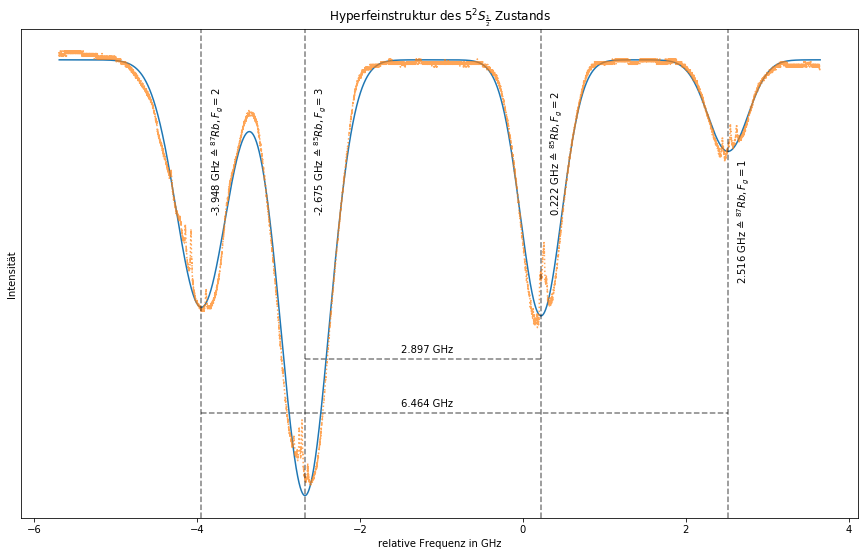

In [150]:
fitParams14, fitCovariances14 = curve_fit(gauss4, x14, y14)

print('fit coefficients:\n', fitParams14)
#print('Covariance matrix:\n', fitCovariances)

#sigma = [np.sqrt(fitCovariances[0,0]), np.sqrt(fitCovariances[1,1]), np.sqrt(fitCovariances[2,2]), np.sqrt(fitCovariances[3,3])]
plt.figure(figsize=(15,9))
plt.plot(x14, gauss4(x14, fitParams14[0], fitParams14[1], fitParams14[2], fitParams14[3], fitParams14[4], fitParams14[5], fitParams14[6], fitParams14[7],
                    fitParams14[8], fitParams14[9], fitParams14[10], fitParams14[11], fitParams14[12], fitParams14[13], fitParams14[14], fitParams14[15]))
plt.plot(x14,y14, ":", alpha=0.7)

xposition = [fitParams14[2], fitParams14[14],fitParams14[6],fitParams14[10]]
typ = ["$^{87}Rb, F_g=2$", "$^{85}Rb, F_g=3$", "$^{85}Rb, F_g=2$", "$^{87}Rb, F_g=1$"]
height = [33,33,33,28]
for xc, t, h in zip(xposition, typ, height):
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
    plt.annotate("%.3f GHz ≙ %s" % (round(xc, 3), t), xy=(xc+0.1, h), rotation=90)
    
plt.hlines(18, xmin=fitParams14[2], xmax=fitParams14[10], linestyle='--', alpha=0.5)
plt.annotate("%.3f GHz" % (round(fitParams14[10] - fitParams14[2], 3)), xy=(-1.5, 18.5))

plt.hlines(22, xmin=fitParams14[6], xmax=fitParams14[14], linestyle='--', alpha=0.5)
plt.annotate("%.3f GHz" %(round(fitParams14[6] - fitParams14[14], 3)), xy=(-1.5, 22.5))

plt.xlabel("relative Frequenz in GHz")
plt.ylabel("Intensität")
plt.yticks([])
plt.title(r'Hyperfeinstruktur des $5^2S_{\frac{1}{2}}$ Zustands')

plt.savefig("Hyperfeinstruktur5S.pdf", bbox_inches="tight")

---

## Auswertung der einzelnen Dips

---

### Dip 1

In [151]:
dip1_df = pd.read_csv("Dip1.csv")
dip1_df.head()

,x-axis,1,2,3
0,second,Volt,Volt,Volt
1,-1.00000000E-03,-1.05525553E-03,-7.86241230369E+00,+44.66143229604E+00
2,-999.96800E-06,+6.98494539E-03,-7.86241230369E+00,+44.86243732274E+00
3,-999.93600E-06,+6.98494539E-03,-7.86241230369E+00,+44.86243732274E+00
4,-999.90400E-06,+6.98494539E-03,-7.86241230369E+00,+44.86243732274E+00


In [152]:
dip1_df.columns = ["Zeit (s)", "Referenz (V)", "Piezo (V)", "Strahl (V)"]
dip1_df.drop([0], inplace=True)
dip1_df.reset_index(drop=True, inplace=True)
dip1_df = dip1_df.astype("float")
dip1_df.head()

,Zeit (s),Referenz (V),Piezo (V),Strahl (V)
0,-0.00100000,-0.00105526,-7.8624123,44.66143230
1,-0.00099997,0.00698495,-7.8624123,44.86243732
2,-0.00099994,0.00698495,-7.8624123,44.86243732
3,-0.00099990,0.00698495,-7.8624123,44.86243732
4,-0.00099987,-0.00105526,-7.8624123,44.86243732


Text(0.5, 1.0, 'ignorieren')

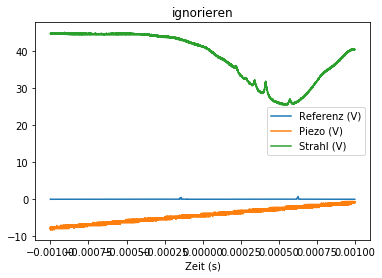

In [153]:
dip1_df.plot(x="Zeit (s)")
plt.title("ignorieren")

[26884 50849]
freier Spektralbereich: 0.75 GHz
zeitlicher Abstand zwischen 2 Peaks: 0.00076688 s
1 Sekunde entspricht: 977.9887335697894 GHz


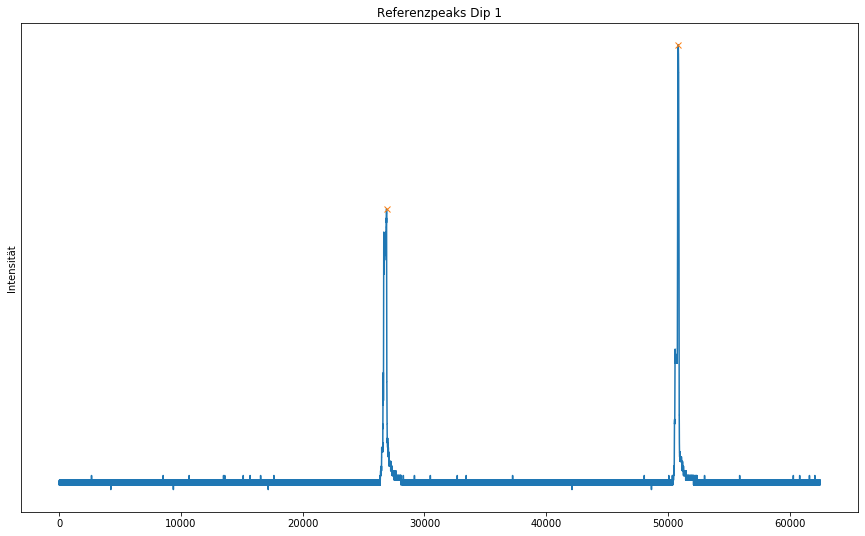

In [154]:
ref1 = dip1_df["Referenz (V)"]
refpeaks1, _ = find_peaks(ref1, height=0.2, distance=1000)
plt.figure(figsize=(15,9))
plt.plot(ref1)
plt.plot(refpeaks1, ref1[refpeaks1], "x")
plt.title("Referenzpeaks Dip 1")
plt.ylabel("Intensität")
plt.yticks([])
print(refpeaks1)

# vergangene Zeit zwischen zwei Maxima
delta_t1 = dip1_df.iloc[refpeaks1[1],0] - dip1_df.iloc[refpeaks1[0],0]
delta_t1

# Skala berechnen: freier Spektralbereich ny=c/4d
ny_fsr = 3*10**8/(4*0.1)/(10**9) #in GHz
print("freier Spektralbereich:", ny_fsr, "GHz")
print("zeitlicher Abstand zwischen 2 Peaks:", delta_t1, "s")

# Abstand der Zeit entspricht Abstand der Frequenzen: delta_t1 entsprechen 0,75 GHz
print("1 Sekunde entspricht:", ny_fsr/delta_t1, "GHz")

plt.savefig("ReferenzpeaksDip1.pdf", bbox_inches="tight")

In [155]:
dip1_skal_df = dip1_df.copy()
dip1_skal_df.rename(columns= {"Zeit (s)": "Frequenz (GHz)"}, inplace=True)
dip1_skal_df[["Frequenz (GHz)"]] = dip1_skal_df[["Frequenz (GHz)"]]*ny_fsr/delta_t1
dip1_skal_df

,Frequenz (GHz),Referenz (V),Piezo (V),Strahl (V)
0,-0.97798873,-0.00105526,-7.86241230,44.66143230
1,-0.97795744,0.00698495,-7.86241230,44.86243732
2,-0.97792614,0.00698495,-7.86241230,44.86243732
3,-0.97789485,0.00698495,-7.86241230,44.86243732
4,-0.97786355,-0.00105526,-7.86241230,44.86243732
...,...,...,...,...
62495,0.97783226,0.00698495,-0.62623135,40.44032674
62496,0.97786355,0.00698495,-1.02824138,40.44032674
62497,0.97789485,-0.00105526,-1.02824140,40.44032674
62498,0.97792614,-0.00105526,-0.62623135,40.44032674


Text(0.5, 1.0, 'ignorieren')

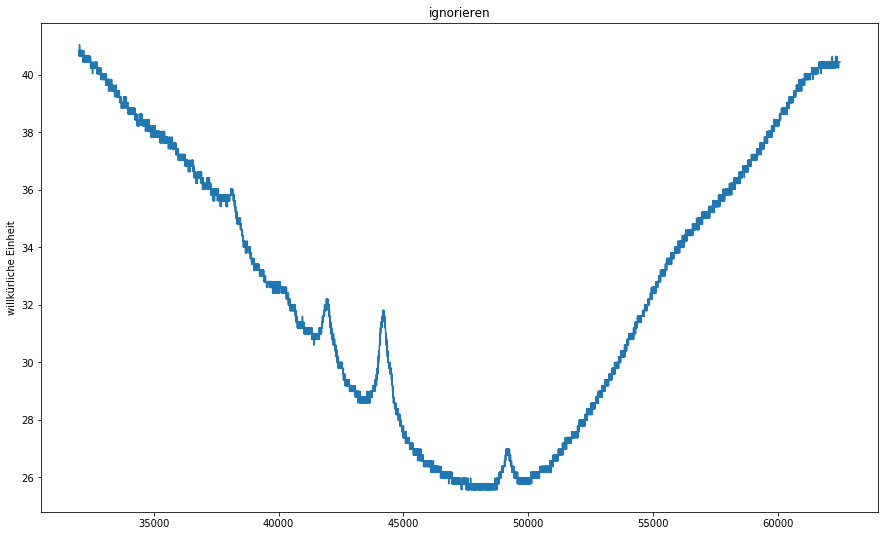

In [156]:
plt.figure(figsize=(15,9))
dip1_skal_df["Strahl (V)"].iloc[32000:].plot()
plt.title("Dip 1")
plt.ylabel("willkürliche Einheit")
plt.title("ignorieren")

Text(0.5, 1.0, 'ignorieren')

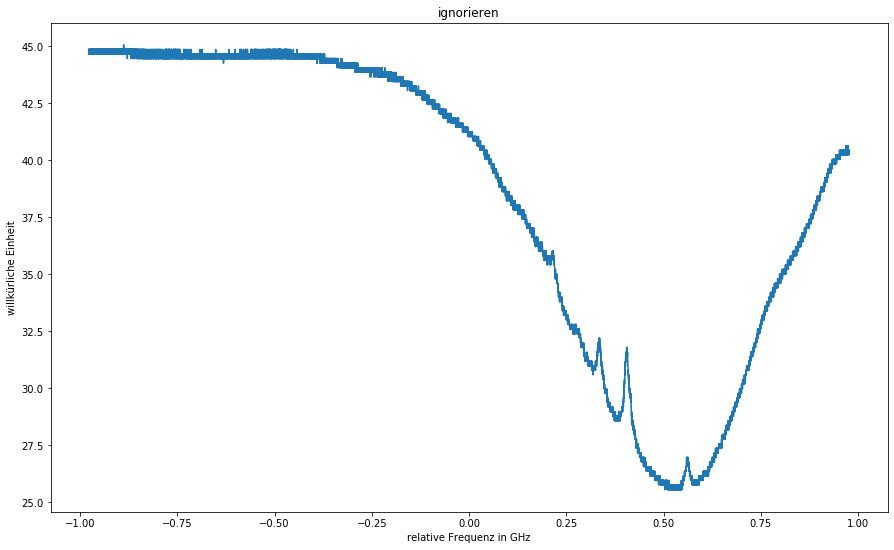

In [157]:
dip1_skal_df.plot(x="Frequenz (GHz)", y="Strahl (V)", figsize=(15,9), legend=None)
plt.title("Dip 1")
plt.xlabel("relative Frequenz in GHz")
plt.ylabel("willkürliche Einheit")
plt.title("ignorieren")

In [158]:
x1 = dip1_skal_df["Frequenz (GHz)"].iloc[32000:]
y1 = dip1_skal_df["Strahl (V)"].iloc[32000:]

#print(x1)
#print(y1)

fit coefficients:
 [ 42.35257583 -16.40182681   0.51775118   0.54836545]


Text(0.5, 1.0, 'ignorieren')

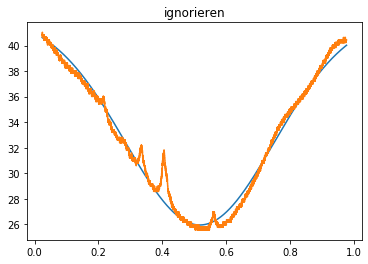

In [159]:
testfitParams1, testfitCovariances1 = curve_fit(gauss, x1, y1, bounds=((40, -20, 0.5, 0.5), (45, -15, 0.6, 1)))
print('fit coefficients:\n', testfitParams1)
#print('Covariance matrix:\n', testfitCovariances1)

sigma = [np.sqrt(testfitCovariances1[0,0]), np.sqrt(testfitCovariances1[1,1]), np.sqrt(testfitCovariances1[2,2]), np.sqrt(testfitCovariances1[3,3])]
plt.plot(x1, gauss(x1, testfitParams1[0], testfitParams1[1], testfitParams1[2], testfitParams1[3]))
plt.plot(x1,y1)
plt.title("ignorieren")

fit coefficients:
 [ 4.34110566e+01 -1.81065069e+01  5.05827128e-01  5.79812187e-01
  5.46694851e-02  2.13394866e-01  2.92501150e-02  3.36287920e-02
  2.82641703e-01  2.68729880e-02  8.96597210e-02  3.35481675e-01
  2.42150243e-02  2.09048249e-01  4.07303349e-01  3.30602197e-02
  1.66470798e-02  5.60210329e-01  1.00000000e-02]


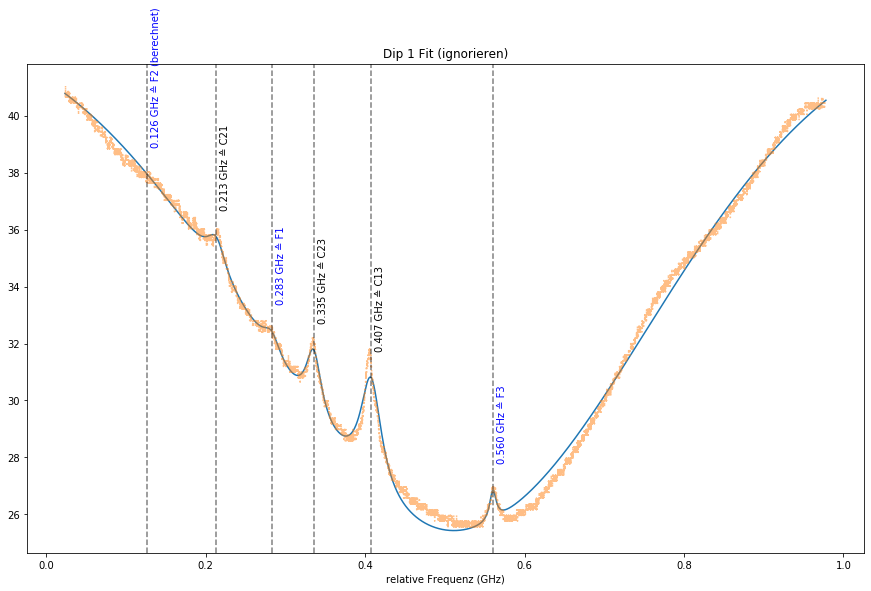

In [160]:
# Dip 1 Fit

fitParams1, fitCovariances1 = curve_fit(dip5, x1, y1, bounds=((40, -22, 0.5, 0.4, 0, 0.18, 0.01, 0, 0.25, 0.01, 0, 0.32, 0.01, 0, 0.38, 0.01, 0, 0.55, 0.01), 
                                                              (46, -18, 0.6, 1.0, 5, 0.25, 0.05, 5, 0.30, 0.05, 5, 0.38, 0.05, 5, 0.43, 0.05, 5, 0.62, 0.05)))
print('fit coefficients:\n', fitParams1)
#print('Covariance matrix:\n', fitCovariances)

plt.figure(figsize=(15,9))
plt.title("Dip 1 Fit (ignorieren)")
dip5(x1, fitParams1[0], fitParams1[1], fitParams1[2], fitParams1[3], fitParams1[4], fitParams1[5], fitParams1[6], fitParams1[7]
                     , fitParams1[8], fitParams1[9], fitParams1[10], fitParams1[11], fitParams1[12], fitParams1[13], fitParams1[14], fitParams1[15]
                    , fitParams1[16], fitParams1[17], fitParams1[18])
plt.plot(x1, dip5(x1, fitParams1[0], fitParams1[1], fitParams1[2], fitParams1[3], fitParams1[4], fitParams1[5], fitParams1[6], fitParams1[7]
                     , fitParams1[8], fitParams1[9], fitParams1[10], fitParams1[11], fitParams1[12], fitParams1[13], fitParams1[14], fitParams1[15]
                    , fitParams1[16], fitParams1[17], fitParams1[18]))
plt.plot(x1,y1,":", alpha=0.5)
plt.xlabel("relative Frequenz (GHz)")

xposition = [0.126, fitParams1[5], fitParams1[8],fitParams1[11],fitParams1[14],fitParams1[17]]
typ = ["F2 (berechnet)", "C21", "F1", "C23", "C13", "F3"]
color = ["b", "k", "b", "k", "k", "b"]
for xc, t, c in zip(xposition, typ, color):
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
    plt.annotate("%.3f GHz ≙ %s" % (round(xc, 3), t), xy=(xc+0.005, dip5(xc, fitParams1[0], fitParams1[1], fitParams1[2], fitParams1[3], fitParams1[4], fitParams1[5], fitParams1[6], fitParams1[7]
                     , fitParams1[8], fitParams1[9], fitParams1[10], fitParams1[11], fitParams1[12], fitParams1[13], fitParams1[14], fitParams1[15]
                    , fitParams1[16], fitParams1[17], fitParams1[18])+1), rotation=90, color=c)

fit coefficients:
 [ 4.34239319e+01 -1.81091064e+01  5.05824812e-01  5.80392677e-01
  1.14491154e-01  2.13374615e-01  1.40971560e-02  3.34479983e+00
  4.43220285e-02  2.82629737e-01  2.03052604e-02  7.44931254e-01
  1.47456084e-01  3.35483797e-01  1.47252346e-02  1.70654973e+00
  4.62539648e-01  4.07284162e-01  1.47391238e-02  3.96161395e+00
  2.48254933e-02  5.60421522e-01  5.00003439e-03  1.74224024e+00]
0.12733278299291761


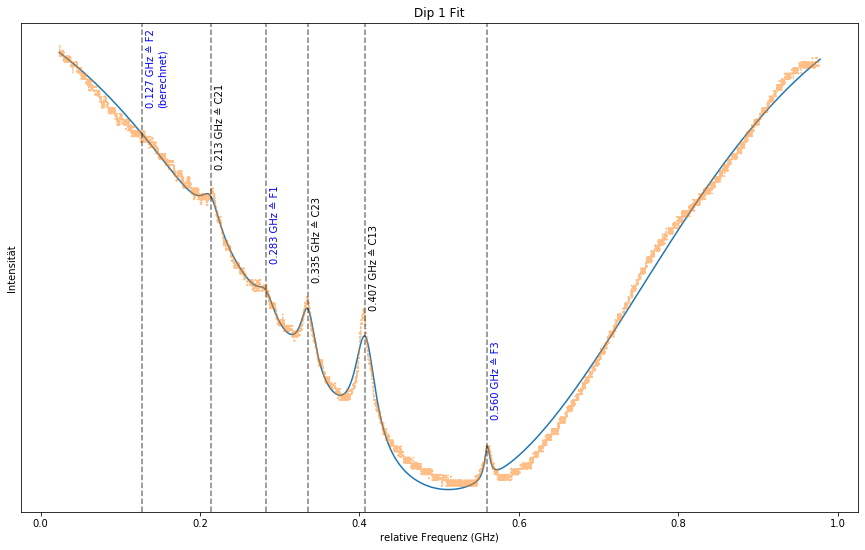

In [161]:
# Dip 1 Fit mit Sättigung

fitParams1, fitCovariances1 = curve_fit(dip5S, x1, y1, bounds=((40, -22, 0.45, 0.4, 0, 0.18, 0.01, 0, 0, 0.27, 0.01, 0, 0, 0.32, 0.01, 0, 0, 0.38, 0.01, 0, 0, 0.55, 0.005, 0), 
                                                              (46, -18, 0.6, 1.0, 5, 0.25, 0.05, 10, 3, 0.29, 0.03, 1, 5, 0.38, 0.05, 10, 5, 0.43, 0.05, 10, 5, 0.62, 0.05, 10)))
print('fit coefficients:\n', fitParams1)
#print('Covariance matrix:\n', fitCovariances)

plt.figure(figsize=(15,9))
plt.title("Dip 1 Fit")
dip5S(x1, fitParams1[0], fitParams1[1], fitParams1[2], fitParams1[3], fitParams1[4], fitParams1[5], fitParams1[6], fitParams1[7]
                     , fitParams1[8], fitParams1[9], fitParams1[10], fitParams1[11], fitParams1[12], fitParams1[13], fitParams1[14], fitParams1[15]
                    , fitParams1[16], fitParams1[17], fitParams1[18], fitParams1[19], fitParams1[20], fitParams1[21], fitParams1[22], fitParams1[23])
plt.plot(x1, dip5S(x1, fitParams1[0], fitParams1[1], fitParams1[2], fitParams1[3], fitParams1[4], fitParams1[5], fitParams1[6], fitParams1[7]
                     , fitParams1[8], fitParams1[9], fitParams1[10], fitParams1[11], fitParams1[12], fitParams1[13], fitParams1[14], fitParams1[15]
                    , fitParams1[16], fitParams1[17], fitParams1[18], fitParams1[19], fitParams1[20], fitParams1[21], fitParams1[22], fitParams1[23]))
plt.plot(x1,y1,":", alpha=0.5)
plt.xlabel("relative Frequenz (GHz)")
plt.ylabel("Intensität")
plt.yticks([])

# F2 berechnen:
dip1_f2 = ((2*fitParams1[5]-fitParams1[9]) + (2*fitParams1[13]-fitParams1[21]))/2
print(dip1_f2)

xposition = [dip1_f2, fitParams1[5], fitParams1[9],fitParams1[13],fitParams1[17],fitParams1[21]]
typ = ["F2 \n(berechnet)", "C21", "F1", "C23", "C13", "F3"]
color = ["b", "k", "b", "k", "k", "b"]
for xc, t, c in zip(xposition, typ, color):
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
    plt.annotate("%.3f GHz ≙ %s" % (round(xc, 3), t), xy=(xc+0.005, dip5S(xc, fitParams1[0], fitParams1[1], fitParams1[2], fitParams1[3], fitParams1[4], fitParams1[5], fitParams1[6], fitParams1[7]
                     , fitParams1[8], fitParams1[9], fitParams1[10], fitParams1[11], fitParams1[12], fitParams1[13], fitParams1[14], fitParams1[15]
                    , fitParams1[16], fitParams1[17], fitParams1[18], fitParams1[19], fitParams1[20], fitParams1[21], fitParams1[22], fitParams1[23])+1), rotation=90, color=c)
    
plt.savefig("Dip1.pdf", bbox_inches="tight")

Literatur (Versuchsanleitung S.10):  
F2 -> F1 : 156,947 MHz  
F1 -> F3 : 266,650 MHz  
F2 -> F3: 423,597 MHz  

Werte aus Plot:  
F2 -> F1 : 156 MHz  
F2 -> F1 : 277 MHz  
F0 -> F1: 433 MHz

In [162]:
#plt.plot(x1, lorentzS(x1,2.62392391e+01,3.00000000e-01,8.15460733e-02,3.64904295e+01))

In [163]:
#plt.plot(x1, lorentzS(x1, 4.18229997e-02, 2e-01, 0.1, 0.5))

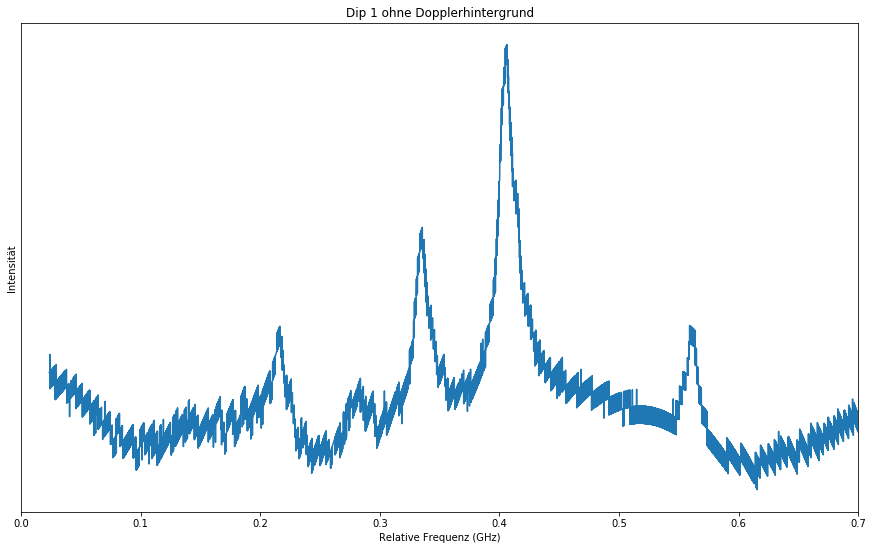

In [164]:
plt.figure(figsize=(15,9))
plt.plot(x1, y1 - gauss(x1, testfitParams1[0], testfitParams1[1], testfitParams1[2], testfitParams1[3]))
plt.title("Dip 1 ohne Dopplerhintergrund")
plt.xlim(0,0.7)
plt.xlabel("Relative Frequenz (GHz)")
plt.ylabel("Intensität")
plt.yticks([])
plt.savefig("Dip1 ohne Doppler.pdf", bbox_inches="tight")

---

### Dip 2

In [165]:
dip2_df = pd.read_csv("Dip2.csv")
dip2_df.head()

,x-axis,1,2,3
0,second,Volt,Volt,Volt
1,-500.00000E-06,+6.98494539E-03,-1.02824139595E+00,+38.83228652179E+00
2,-499.98400E-06,-1.05525553E-03,-1.43025144935E+00,+38.83228652179E+00
3,-499.96800E-06,+6.98494539E-03,-1.43025144935E+00,+38.83228652179E+00
4,-499.95200E-06,+6.98494539E-03,-1.43025144935E+00,+38.83228652179E+00


Text(0.5, 1.0, 'ignorieren')

<Figure size 1080x648 with 0 Axes>

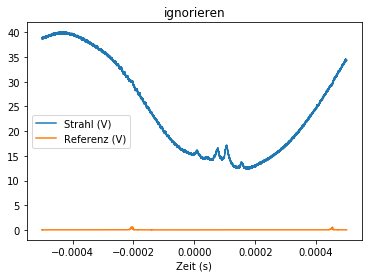

In [166]:
dip2_df.columns = ["Zeit (s)", "Referenz (V)", "Piezo (V)", "Strahl (V)"]
dip2_df.drop([0], inplace=True)
dip2_df.reset_index(drop=True, inplace=True)
dip2_df = dip2_df.astype("float")
dip2_df.head()

plt.figure(figsize=(15,9))
dip2_df.plot(x="Zeit (s)", y=["Strahl (V)", "Referenz (V)"])
plt.title("ignorieren")

[18604 59565]
freier Spektralbereich: 0.75 GHz
zeitlicher Abstand zwischen 2 Peaks: 0.000655376 s
1 Sekunde entspricht: 1144.3812406923657 GHz


Text(0.5, 1.0, 'ignorieren')

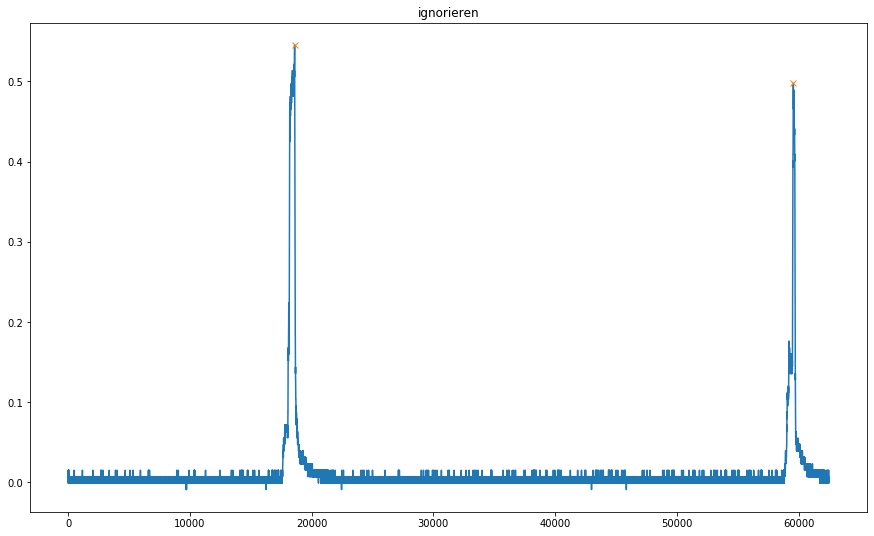

In [167]:
ref2 = dip2_df["Referenz (V)"]
refpeaks2, _ = find_peaks(ref2, height=0.2, distance=1000)
plt.figure(figsize=(15,9))
plt.plot(ref2)
plt.plot(refpeaks2, ref2[refpeaks2], "x")
print(refpeaks2)

# vergangene Zeit zwischen zwei Maxima
delta_t2 = dip2_df.iloc[refpeaks2[1],0] - dip2_df.iloc[refpeaks2[0],0]
delta_t2

# Skala berechnen: freier Spektralbereich ny=c/4d
ny_fsr = 3*10**8/(4*0.1)/(10**9) #in GHz
print("freier Spektralbereich:", ny_fsr, "GHz")
print("zeitlicher Abstand zwischen 2 Peaks:", delta_t2, "s")

# Abstand der Zeit entspricht Abstand der Frequenzen: delta_t2 entsprechen 0,75 GHz
print("1 Sekunde entspricht:", ny_fsr/delta_t2, "GHz")

plt.title("ignorieren")

In [168]:
dip2_skal_df = dip2_df.copy()
dip2_skal_df.rename(columns= {"Zeit (s)": "Frequenz (GHz)"}, inplace=True)
dip2_skal_df[["Frequenz (GHz)"]] = dip2_skal_df[["Frequenz (GHz)"]]*ny_fsr/delta_t2
dip2_skal_df

,Frequenz (GHz),Referenz (V),Piezo (V),Strahl (V)
0,-0.57219062,0.00698495,-1.02824140,38.83228652
1,-0.57217231,-0.00105526,-1.43025145,38.83228652
2,-0.57215400,0.00698495,-1.43025145,38.83228652
3,-0.57213569,0.00698495,-1.43025145,38.83228652
4,-0.57211738,-0.00105526,-1.43025145,38.83228652
...,...,...,...,...
62495,0.57209907,0.00698495,2.18783903,34.41017593
62496,0.57211738,0.00698495,2.18783903,34.41017593
62497,0.57213569,0.00698495,2.18783903,34.41017593
62498,0.57215400,0.00698495,2.18783903,34.41017593


Text(0, 0.5, 'willkürliche Einheit')

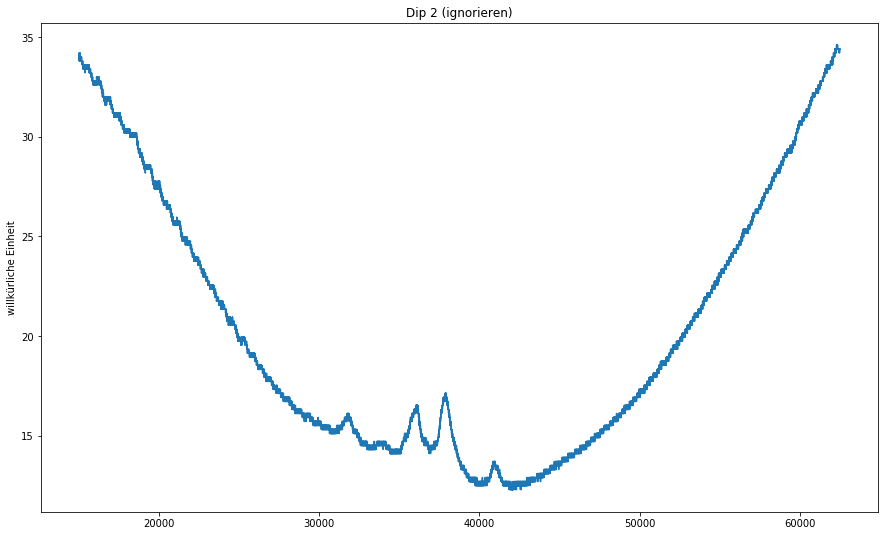

In [169]:
plt.figure(figsize=(15,9))
dip2_skal_df["Strahl (V)"].iloc[15000:].plot()
plt.title("Dip 2 (ignorieren)")
plt.ylabel("willkürliche Einheit")

Text(0, 0.5, 'willkürliche Einheit')

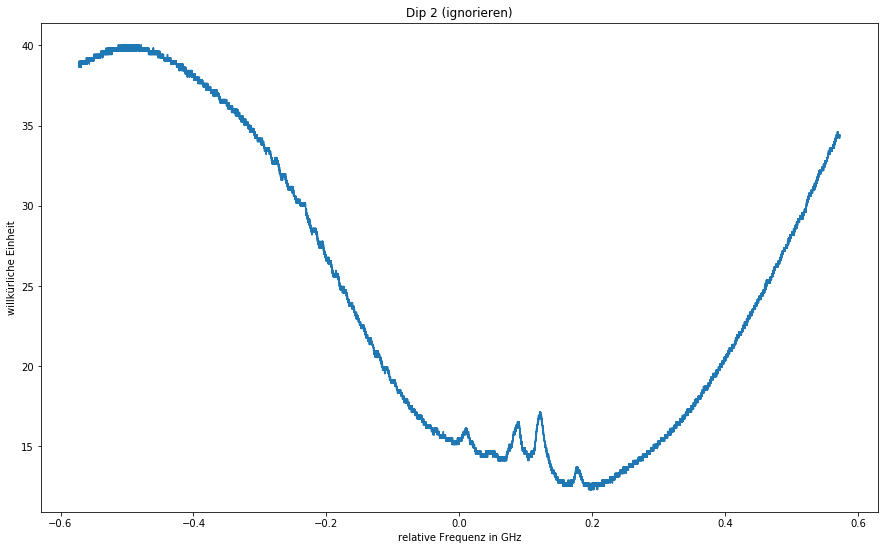

In [170]:
dip2_skal_df.plot(x="Frequenz (GHz)", y="Strahl (V)", figsize=(15,9), legend=None)
plt.title("Dip 2 (ignorieren)")
plt.xlabel("relative Frequenz in GHz")
plt.ylabel("willkürliche Einheit")

In [171]:
x2 = dip2_skal_df["Frequenz (GHz)"].iloc[15000:]
y2 = dip2_skal_df["Strahl (V)"].iloc[15000:]

#print(x2)
#print(y2)

fit coefficients:
 [ 45.         -32.69381393   0.1427963    0.74639237]


Text(0.5, 1.0, 'ignorieren')

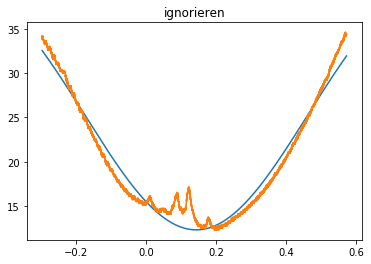

In [172]:
testfitParams2, testfitCovariances2 = curve_fit(gauss, x2, y2, bounds=((40, -35, 0.1, 0.5), (45, -25, 0.2, 1)))
print('fit coefficients:\n', testfitParams2)
#print('Covariance matrix:\n', testfitCovariances2)

sigma = [np.sqrt(testfitCovariances2[0,0]), np.sqrt(testfitCovariances2[1,1]), np.sqrt(testfitCovariances2[2,2]), np.sqrt(testfitCovariances2[3,3])]
plt.plot(x2, gauss(x2, testfitParams2[0], testfitParams2[1], testfitParams2[2], testfitParams2[3]))
#         xtest, fitFunc(xtest, fitParams[0] + sigma[0], fitParams[1] - sigma[1], fitParams[2] + sigma[2]),\
#         xtest, fitFunc(xtest, fitParams[0] - sigma[0], fitParams[1] + sigma[1], fitParams[2] - sigma[2])\
plt.plot(x2,y2)
plt.title("ignorieren")

fit coefficients:
 [ 4.19731036e+01 -3.20000000e+01  1.38749828e-01  6.55362882e-01
  7.51203453e-02  1.11789471e-02  2.34088548e-02  1.30421261e-01
  5.00116150e-02  3.88244698e-02  1.43297304e-01  8.55337234e-02
  2.29270147e-02  3.32163028e-01  1.22689794e-01  3.87443207e-02
  1.28359862e-01  1.80000000e-01  3.00000000e-02]


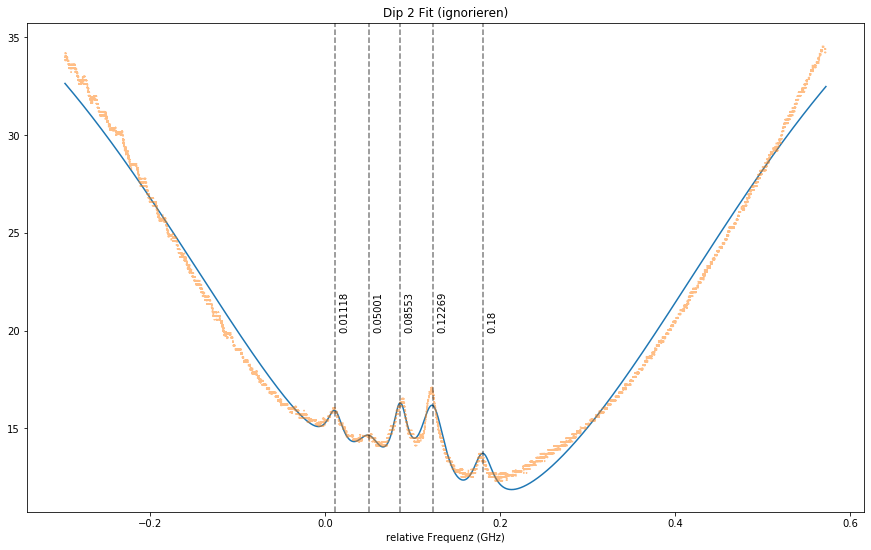

In [173]:
# Dip 2 Fit (ignorieren)

fitParams2, fitCovariances2 = curve_fit(dip5, x2, y2, bounds=((38, -32, 0.1, 0.4, 0, 0.0, 0.01, 0, 0.03, 0.01, 0, 0.08, 0.01, 0, 0.12, 0.01, 0, 0.16, 0.01), 
                                                              (43, -25, 0.2, 0.8, 5, 0.02, 0.05, 5, 0.06, 0.05, 5, 0.11, 0.05, 5, 0.15, 0.05, 5, 0.18, 0.03)))
print('fit coefficients:\n', fitParams2)
#print('Covariance matrix:\n', fitCovariances2)

plt.figure(figsize=(15,9))
plt.title("Dip 2 Fit (ignorieren)")
plt.plot(x2, dip5(x2, fitParams2[0], fitParams2[1], fitParams2[2], fitParams2[3], fitParams2[4], fitParams2[5], fitParams2[6], fitParams2[7]
                     , fitParams2[8], fitParams2[9], fitParams2[10], fitParams2[11], fitParams2[12], fitParams2[13], fitParams2[14], fitParams2[15]
                    , fitParams2[16], fitParams2[17], fitParams2[18]))
plt.plot(x2,y2,":", alpha=0.5)
plt.xlabel("relative Frequenz (GHz)")

xposition = [fitParams2[5],fitParams2[8],fitParams2[11],fitParams2[14],fitParams2[17]]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
    plt.annotate(xc.round(5), xy=(xc+0.005,20), rotation=90)

fit coefficients:
 [ 4.20300670e+01 -3.20000000e+01  1.38756023e-01  6.57065470e-01
  1.52719554e-01  1.12050623e-02  1.10587603e-02  3.33023883e+00
  2.89528050e-01  4.97485536e-02  1.67616938e-02  4.21427591e+00
  3.38697442e-01  8.56723797e-02  1.07950245e-02  3.90480500e+00
  7.39799239e-01  1.22607981e-01  1.46802504e-02  4.88031984e+00
  2.59978793e-01  1.77000000e-01  1.50000000e-02  3.00000000e+00]
-0.016496834765028792


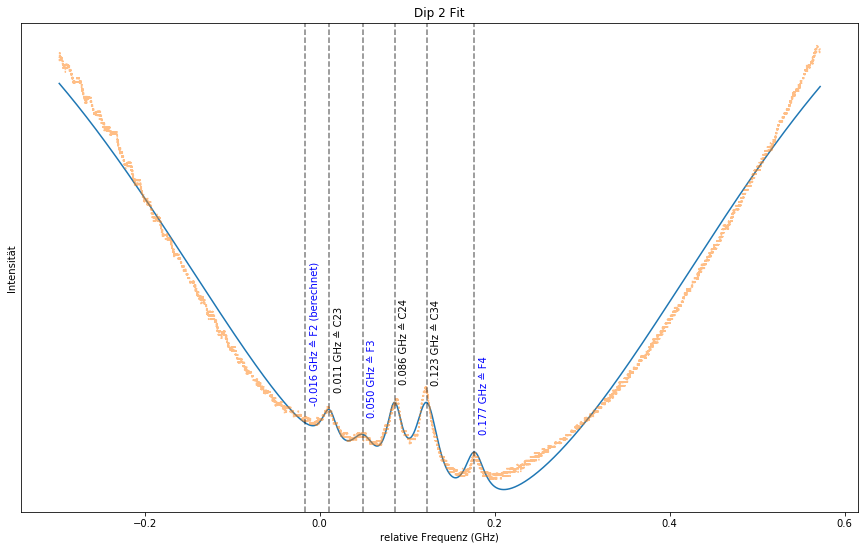

In [174]:
# Dip 2 Fit mit Sättigung

fitParams2, fitCovariances2 = curve_fit(dip5S, x2, y2, bounds=((38, -32, 0.1, 0.4, 0, 0.0, 0.01, 0, 0, 0.03, 0.01, 0, 0, 0.08, 0.01, 0, 0, 0.12, 0.01, 0, 0, 0.16, 0.01, 0), 
                                                              (43, -25, 0.2, 0.8, 5, 0.02, 0.05, 10, 5, 0.06, 0.05, 10, 5, 0.11, 0.05, 10, 5, 0.15, 0.05, 10, 10, 0.177, 0.015, 3)))
print('fit coefficients:\n', fitParams2)
#print('Covariance matrix:\n', fitCovariances2)

plt.figure(figsize=(15,9))
plt.title("Dip 2 Fit")
plt.plot(x2, dip5S(x2, fitParams2[0], fitParams2[1], fitParams2[2], fitParams2[3], fitParams2[4], fitParams2[5], fitParams2[6], fitParams2[7]
                     , fitParams2[8], fitParams2[9], fitParams2[10], fitParams2[11], fitParams2[12], fitParams2[13], fitParams2[14], fitParams2[15]
                    , fitParams2[16], fitParams2[17], fitParams2[18], fitParams2[19], fitParams2[20], fitParams2[21], fitParams2[22], fitParams2[23]))
plt.plot(x2,y2,":", alpha=0.5)
plt.xlabel("relative Frequenz (GHz)")
plt.ylabel("Intensität")
plt.yticks([])

dip2_F2 = ( (2*fitParams2[5] - fitParams2[9]) + (2*fitParams2[13] - fitParams2[21]) )/2
print(dip2_F2)

xposition = [dip2_F2, fitParams2[5], fitParams2[9], fitParams2[13], fitParams2[17], fitParams2[21]]
typ = ["F2 (berechnet)", "C23", "F3", "C24", "C34", "F4"]
color = ["b", "k", "b", "k", "k", "b"]
for xc, t, c in zip(xposition, typ, color):
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
    plt.annotate("%.3f GHz ≙ %s" % (round(xc, 3), t), xy=(xc+0.005, dip5S(xc, fitParams2[0], fitParams2[1], fitParams2[2], fitParams2[3], fitParams2[4], fitParams2[5], fitParams2[6], fitParams2[7]
                     , fitParams2[8], fitParams2[9], fitParams2[10], fitParams2[11], fitParams2[12], fitParams2[13], fitParams2[14], fitParams2[15]
                    , fitParams2[16], fitParams2[17], fitParams2[18], fitParams2[19], fitParams2[20], fitParams2[21], fitParams2[22], fitParams2[23])+1), rotation=90, color=c)
    
plt.savefig("Dip2.pdf", bbox_inches="tight")    

Literatur (Versuchsanleitung S.10):  
F2 -> F3 : 63,401 MHz  
F3 -> F4 : 120,640 MHz  
F2 -> F4: 184,041 MHz  

Werte aus Plot:  
F2 -> F3 : 66 MHz  
F3 -> F4 : 127 MHz  
F2 -> F4: 193 MHz

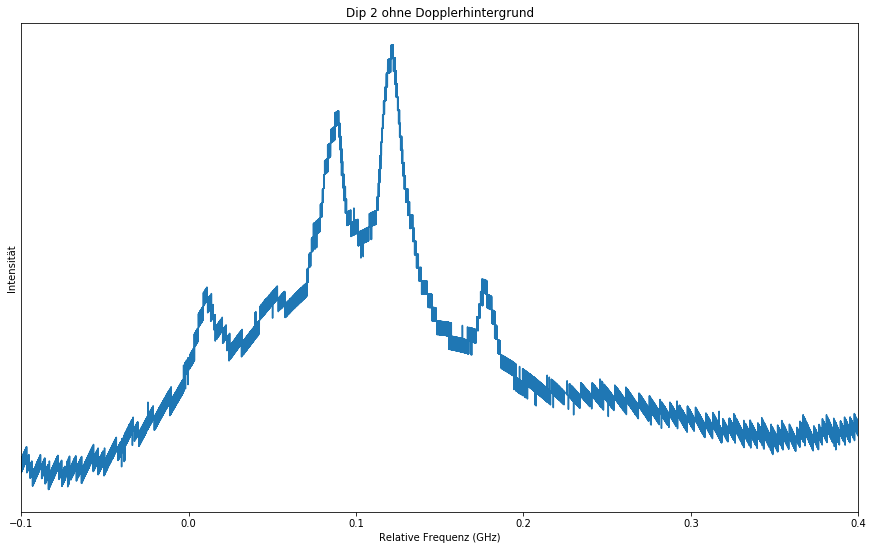

In [175]:
plt.figure(figsize=(15,9))
plt.plot(x2, y2 - gauss(x2, testfitParams2[0], testfitParams2[1], testfitParams2[2], testfitParams2[3]))
plt.title("Dip 2 ohne Dopplerhintergrund")
plt.xlim(-0.1,0.4)
plt.xlabel("Relative Frequenz (GHz)")
plt.ylabel("Intensität")
plt.yticks([])
plt.savefig("Dip2 ohne Doppler.pdf", bbox_inches="tight")

---

### Dip 3

In [176]:
dip3_df = pd.read_csv("Dip3.csv")
dip3_df.head()

,x-axis,1,2,3
0,second,Volt,Volt,Volt
1,-500.00000E-06,+6.98494539E-03,+7.41396972537E+00,+43.05339208245E+00
2,-499.98400E-06,+6.98494539E-03,+7.41396972537E+00,+43.25439710915E+00
3,-499.96800E-06,-1.05525553E-03,+7.41396972537E+00,+43.05339208245E+00
4,-499.95200E-06,-1.05525553E-03,+7.01195967197E+00,+43.05339208245E+00


In [177]:
dip3_df.columns = ["Zeit (s)", "Referenz (V)", "Piezo (V)", "Strahl (V)"]
dip3_df.drop([0], inplace=True)
dip3_df.reset_index(drop=True, inplace=True)
dip3_df = dip3_df.astype("float")
dip3_df.head()

,Zeit (s),Referenz (V),Piezo (V),Strahl (V)
0,-0.00050000,0.00698495,7.41396973,43.05339208
1,-0.00049998,0.00698495,7.41396973,43.25439711
2,-0.00049997,-0.00105526,7.41396973,43.05339208
3,-0.00049995,-0.00105526,7.01195967,43.05339208
4,-0.00049994,-0.00105526,7.41396973,43.25439711


Text(0.5, 1.0, 'ignorieren')

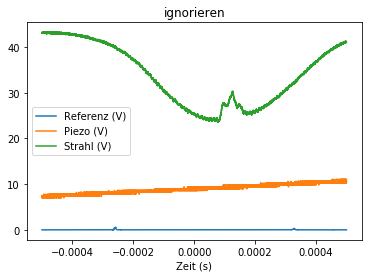

In [178]:
dip3_df.plot(x="Zeit (s)")
plt.title("ignorieren")

[15146 51770]
freier Spektralbereich: 0.75 GHz
zeitlicher Abstand zwischen 2 Peaks: 0.000585984 s
1 Sekunde entspricht: 1279.8984272608125 GHz


Text(0.5, 1.0, 'ignorieren')

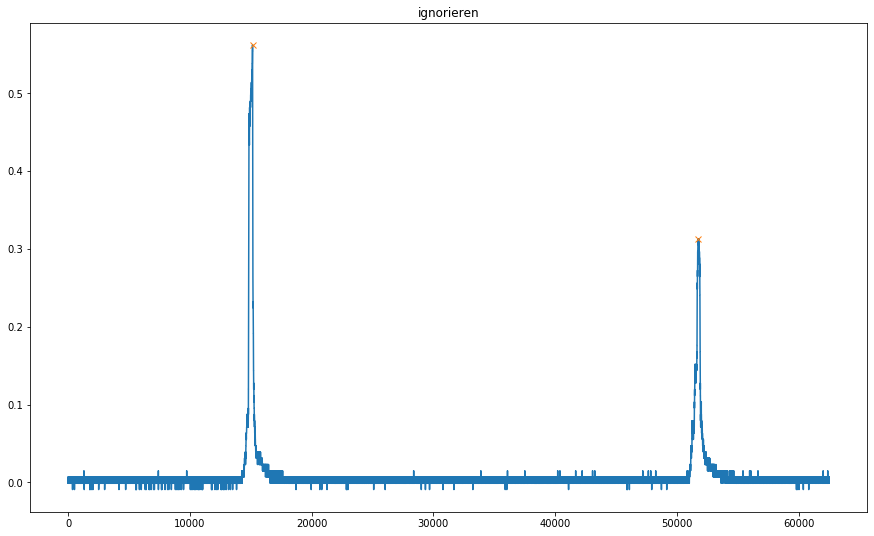

In [179]:
ref3 = dip3_df["Referenz (V)"]
refpeaks3, _ = find_peaks(ref3, height=0.2, distance=1000)
plt.figure(figsize=(15,9))
plt.plot(ref3)
plt.plot(refpeaks3, ref3[refpeaks3], "x")
print(refpeaks3)

# vergangene Zeit zwischen zwei Maxima
delta_t3 = dip3_df.iloc[refpeaks3[1],0] - dip3_df.iloc[refpeaks3[0],0]
delta_t3

# Skala berechnen: freier Spektralbereich ny=c/4d
ny_fsr = 3*10**8/(4*0.1)/(10**9) #in GHz
print("freier Spektralbereich:", ny_fsr, "GHz")
print("zeitlicher Abstand zwischen 2 Peaks:", delta_t3, "s")

# Abstand der Zeit entspricht Abstand der Frequenzen: delta_t3 entsprechen 0,75 GHz
print("1 Sekunde entspricht:", ny_fsr/delta_t3, "GHz")

plt.title("ignorieren")

In [180]:
dip3_skal_df = dip3_df.copy()
dip3_skal_df.rename(columns= {"Zeit (s)": "Frequenz (GHz)"}, inplace=True)
dip3_skal_df[["Frequenz (GHz)"]] = dip3_skal_df[["Frequenz (GHz)"]]*ny_fsr/delta_t3
dip3_skal_df

,Frequenz (GHz),Referenz (V),Piezo (V),Strahl (V)
0,-0.63994921,0.00698495,7.41396973,43.05339208
1,-0.63992874,0.00698495,7.41396973,43.25439711
2,-0.63990826,-0.00105526,7.41396973,43.05339208
3,-0.63988778,-0.00105526,7.01195967,43.05339208
4,-0.63986730,-0.00105526,7.41396973,43.25439711
...,...,...,...,...
62495,0.63984682,-0.00105526,11.03206019,41.24434684
62496,0.63986730,-0.00105526,11.03206021,41.04334182
62497,0.63988778,0.00698495,10.63005016,41.24434684
62498,0.63990826,0.00698495,10.63005015,41.04334182


Text(0, 0.5, 'willkürliche Einheit')

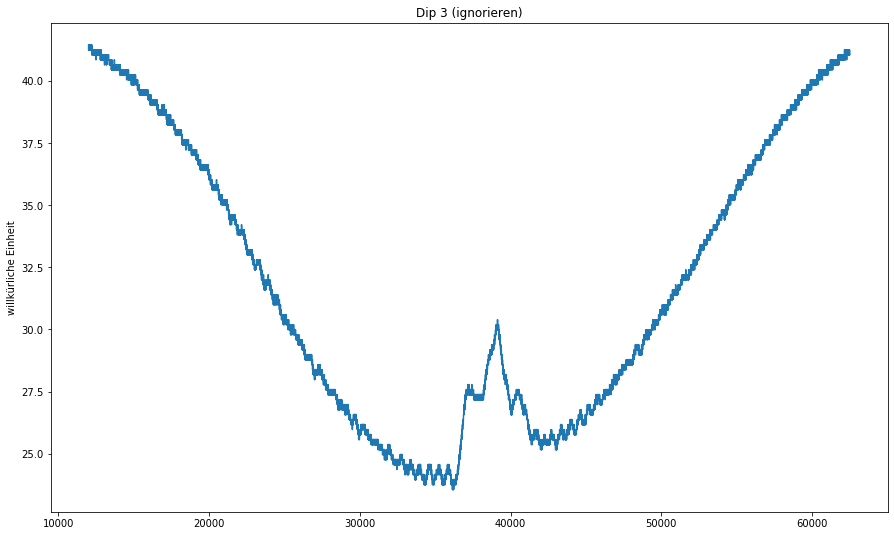

In [181]:
plt.figure(figsize=(15,9))
dip3_skal_df["Strahl (V)"].iloc[12000:].plot()
plt.title("Dip 3 (ignorieren)")
plt.ylabel("willkürliche Einheit")

Text(0, 0.5, 'willkürliche Einheit')

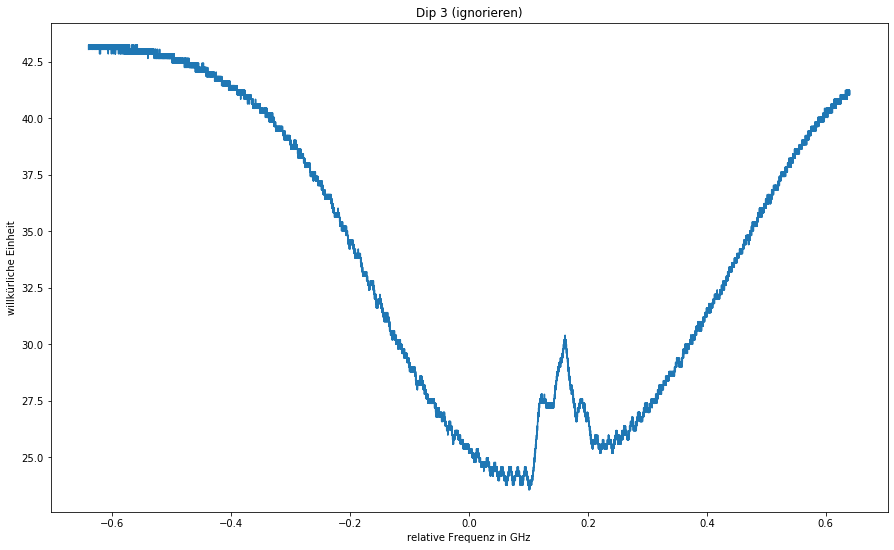

In [182]:
dip3_skal_df.plot(x="Frequenz (GHz)", y="Strahl (V)", figsize=(15,9), legend=None)
plt.title("Dip 3 (ignorieren)")
plt.xlabel("relative Frequenz in GHz")
plt.ylabel("willkürliche Einheit")

In [183]:
x3 = dip3_skal_df["Frequenz (GHz)"].iloc[12000:]
y3 = dip3_skal_df["Strahl (V)"].iloc[12000:]

#print(x3)
#print(y3)

fit coefficients:
 [ 46.02341258 -21.480075     0.12621689   0.7       ]
Covariance matrix:
 [[ 4.33896453e-03 -4.01590018e-03 -1.44199107e-07  1.22416580e-04]
 [-4.01590018e-03  3.79877535e-03  1.37763107e-07 -1.11033662e-04]
 [-1.44199107e-07  1.37763107e-07  2.13956563e-08 -3.63641675e-09]
 [ 1.22416580e-04 -1.11033662e-04 -3.63641675e-09  3.61742493e-06]]


Text(0.5, 1.0, 'ignorieren')

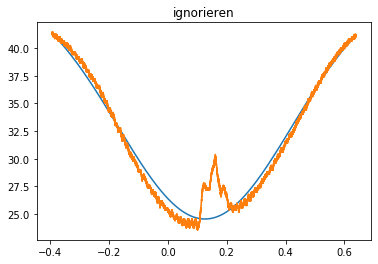

In [184]:
testfitParams3, testfitCovariances3 = curve_fit(gauss, x3, y3, bounds=((40, -22, 0.05, 0.4), (48, -17, 0.15, 0.7)))
print('fit coefficients:\n', testfitParams3)
print('Covariance matrix:\n', testfitCovariances3)

#sigma = [np.sqrt(testfitCovariances3[0,0]), np.sqrt(testfitCovariances[1,1]), np.sqrt(testfitCovariances[2,2]), np.sqrt(testfitCovariances[3,3])]
plt.plot(x3, gauss(x3, testfitParams3[0], testfitParams3[1], testfitParams3[2], testfitParams3[3]))
plt.plot(x3,y3)
plt.title("ignorieren")

fit coefficients:
 [ 4.46074405e+01 -2.20000000e+01  1.29733688e-01  6.27068514e-01
  5.25707899e-02  1.21510952e-01  1.34336969e-02  4.00408727e-01
  1.49625833e-01  6.00000000e-02  5.72693442e-02  1.61170131e-01
  1.45087921e-02  2.01724227e-01  1.90792992e-01  6.00000000e-02]


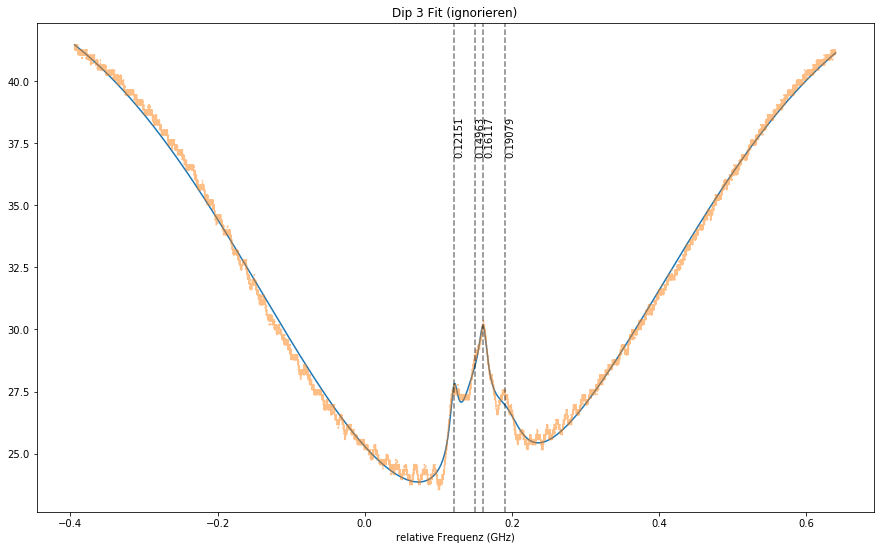

In [185]:
# Dip 3 Fit (ignorieren)

fitParams3, fitCovariances3 = curve_fit(dip4, x3, y3, bounds=((40, -22, 0.05, 0.4, 0, 0.11, 0.01, 0, 0.14, 0.01, 0, 0.16, 0.01, 0, 0.18, 0.01), 
                                                              (48, -17, 0.15, 0.7, 5, 0.14, 0.06, 5, 0.16, 0.06, 5, 0.17, 0.06, 5, 0.2, 0.06)))
print('fit coefficients:\n', fitParams3)
#print('Covariance matrix:\n', fitCovariances3)

plt.figure(figsize=(15,9))
plt.title("Dip 3 Fit (ignorieren)")
plt.plot(x3, dip4(x3, fitParams3[0], fitParams3[1], fitParams3[2], fitParams3[3], fitParams3[4], fitParams3[5], fitParams3[6], fitParams3[7]
                     , fitParams3[8], fitParams3[9], fitParams3[10], fitParams3[11], fitParams3[12], fitParams3[13], fitParams3[14], fitParams3[15]))
plt.plot(x3,y3,":", alpha=0.5)
plt.xlabel("relative Frequenz (GHz)")

xposition = [fitParams3[5],fitParams3[8],fitParams3[11],fitParams3[14]]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
    plt.annotate(xc.round(5), xy=(xc+0.001,37), rotation=90)

fit coefficients:
 [ 4.45501993e+01 -2.20000000e+01  1.29930226e-01  6.24935826e-01
  6.93464160e-02  1.21515027e-01  1.00004915e-02  7.83946145e-01
  1.16405304e+00  1.50000000e-01  2.11246715e-02  7.31448796e+00
  7.40162240e-02  1.61116160e-01  1.00012746e-02  9.69954235e-01
  3.13574785e-01  1.90000000e-01  5.10365783e-02  8.61867980e-01]


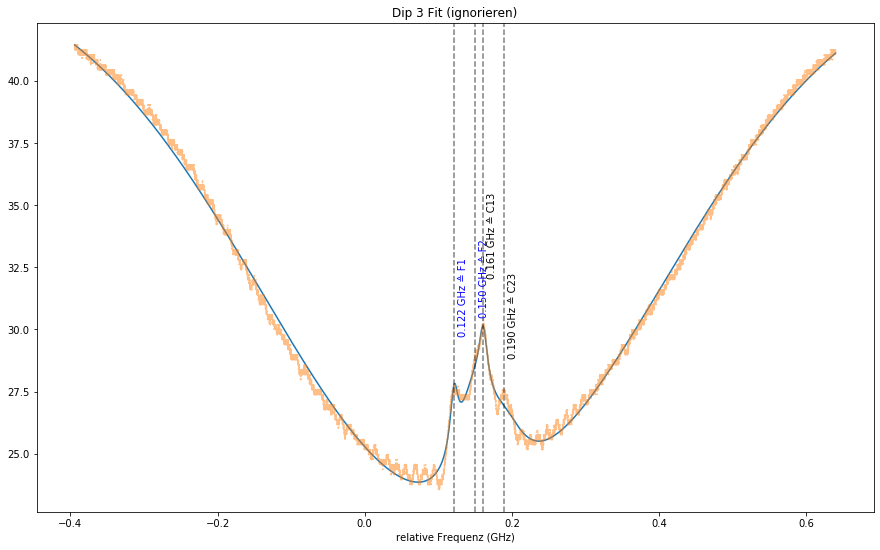

In [186]:
# Dip 3 Fit mit Sättigung (4 Dips) (ignorieren)

fitParams3, fitCovariances3 = curve_fit(dip4S, x3, y3, bounds=((40, -22, 0.05, 0.4, 0, 0.11, 0.01, 0, 0, 0.14, 0.01, 0, 0, 0.16, 0.01, 0, 0, 0.19, 0.01, 0), 
                                                              (48, -17, 0.15, 0.7, 5, 0.14, 0.06, 10, 5, 0.15, 0.06, 10, 5, 0.17, 0.08, 10, 1, 0.191, 0.09, 1)))
print('fit coefficients:\n', fitParams3)
#print('Covariance matrix:\n', fitCovariances3)

plt.figure(figsize=(15,9))
plt.title("Dip 3 Fit (ignorieren)")
plt.plot(x3, dip4S(x3, fitParams3[0], fitParams3[1], fitParams3[2], fitParams3[3], fitParams3[4], fitParams3[5], fitParams3[6], fitParams3[7]
                     , fitParams3[8], fitParams3[9], fitParams3[10], fitParams3[11], fitParams3[12], fitParams3[13], fitParams3[14], fitParams3[15]
                     , fitParams3[16], fitParams3[17], fitParams3[18], fitParams3[19]))
plt.plot(x3,y3,":", alpha=0.5)
plt.xlabel("relative Frequenz (GHz)")

xposition = [fitParams3[5], fitParams3[9], fitParams3[13], fitParams3[17]]
typ = ["F1", "F2", "C13", "C23", "?"]
color = ["b", "b", "k", "k"]

for xc, t, c in zip(xposition, typ, color):
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
    plt.annotate("%.3f GHz ≙ %s" % (round(xc, 3), t), xy=(xc+0.005, dip4S(xc, fitParams3[0], fitParams3[1], fitParams3[2], fitParams3[3], fitParams3[4], fitParams3[5], fitParams3[6], fitParams3[7]
                     , fitParams3[8], fitParams3[9], fitParams3[10], fitParams3[11], fitParams3[12], fitParams3[13], fitParams3[14], fitParams3[15]
                    , fitParams3[16], fitParams3[17], fitParams3[18], fitParams3[19])+2), rotation=90, color=c)

fit coefficients:
 [ 4.44080803e+01 -2.20000000e+01  1.29768790e-01  6.19733980e-01
  1.11200440e-01  1.22366620e-01  1.00180002e-02  1.47870375e+00
  6.76569123e-01  1.35000000e-01  4.61256100e-02  9.97995080e+00
  6.68721070e-01  1.52214100e-01  1.51928442e-02  6.22607256e+00
  5.15613557e-02  1.62227546e-01  1.00000000e-02  5.18561355e-01
  3.28781882e-01  1.90000000e-01  4.72181034e-02  8.43228233e-01]
0.1120807197610546


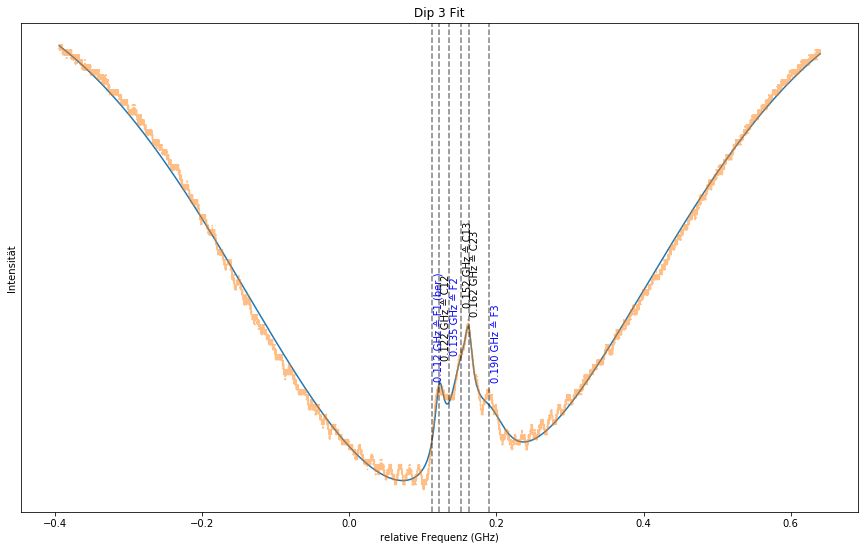

In [188]:
# Dip 3 Fit mit Sättigung (5 Dips) 

fitParams3, fitCovariances3 = curve_fit(dip5S, x3, y3, bounds=((40, -22, 0.05, 0.4, 0, 0.120, 0.01, 0, 0, 0.133, 0.01, 0, 0, 0.149, 0.01, 0, 0, 0.16, 0.01, 0, 0, 0.19, 0.01, 0), 
                                                              (48, -17, 0.15, 0.7, 5, 0.125, 0.06, 10, 5, 0.135, 0.06, 10, 5, 0.155, 0.06, 10, 5, 0.165, 0.08, 10, 1, 0.191, 0.09, 1)))
print('fit coefficients:\n', fitParams3)
#print('Covariance matrix:\n', fitCovariances3)

plt.figure(figsize=(15,9))
plt.title("Dip 3 Fit")
plt.plot(x3, dip5S(x3, fitParams3[0], fitParams3[1], fitParams3[2], fitParams3[3], fitParams3[4], fitParams3[5], fitParams3[6], fitParams3[7]
                     , fitParams3[8], fitParams3[9], fitParams3[10], fitParams3[11], fitParams3[12], fitParams3[13], fitParams3[14], fitParams3[15]
                     , fitParams3[16], fitParams3[17], fitParams3[18], fitParams3[19], fitParams3[20], fitParams3[21], fitParams3[22], fitParams3[23]))
plt.plot(x3,y3,":", alpha=0.5)
plt.xlabel("relative Frequenz (GHz)")
plt.ylabel("Intensität")
plt.yticks([])

dip3_f1 = ((2*fitParams3[5]-fitParams3[9]) + (2*fitParams3[13]-fitParams3[21]))/2
print(dip3_f1)

xposition = [dip3_f1, fitParams3[5], fitParams3[9], fitParams3[13], fitParams3[17], fitParams3[21]]
typ = ["F1 (ber.)", "C12", "F2", "C13", "C23", "F3"]
color = ["b", "k", "b", "k", "k", "b"]
distance = [2.5, 1, 2, 2, 0.5, 1]

for xc, t, c, d in zip(xposition, typ, color, distance):
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
    plt.annotate("%.3f GHz ≙ %s" % (round(xc, 3), t), xy=(xc+0.002, dip5S(xc, fitParams3[0], fitParams3[1], fitParams3[2], fitParams3[3], fitParams3[4], fitParams3[5], fitParams3[6], fitParams3[7]
                     , fitParams3[8], fitParams3[9], fitParams3[10], fitParams3[11], fitParams3[12], fitParams3[13], fitParams3[14], fitParams3[15]
                    , fitParams3[16], fitParams3[17], fitParams3[18], fitParams3[19], fitParams3[20], fitParams3[21], fitParams3[22], fitParams3[23])+d), rotation=90, color=c)
    
plt.savefig("Dip3.pdf", bbox_inches="tight")

Literatur (Versuchsanleitung S.10):  
F1 -> F2 : 29,372 MHz  
F2 -> F3 : 63,401 MHz  
F1 -> F3: 92,773 MHz  
  
Werte aus Plot:  
F1 -> F2 : 23 MHz  
F2 -> F3 : 55 MHz  
F1 -> F3: 78 MHz

fit coefficients:
 [ 4.43052509e+01 -2.20000000e+01  1.30403903e-01  6.16364296e-01
  6.00717318e-02  1.20845636e-01  1.00177068e-02  5.11269157e-01
  1.79716998e-01  1.35000000e-01  1.00000000e-02  6.16971084e+00
  1.01548110e+00  1.49000000e-01  4.50389022e-02  7.93155325e+00
  3.23868993e-01  1.60000000e-01  1.93953724e-02  1.10968511e+00
  5.45351794e-02  1.91000000e-01  1.54599195e-02  2.76431000e-01
  4.38984161e-01  2.15000000e-01  3.31137625e-02  9.33404983e+00]


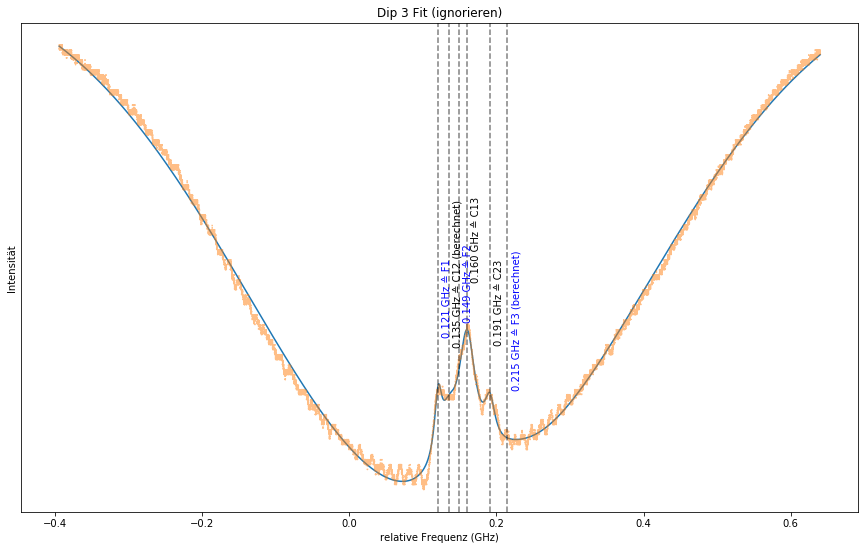

In [189]:
# Dip 3 Fit mit Sättigung (6 Dips) (ignorieren)

fitParams3, fitCovariances3 = curve_fit(dip6S, x3, y3, bounds=((40, -22, 0.05, 0.4, 0, 0.12, 0.01, 0, 0, 0.135, 0.01, 0, 0, 0.149, 0.01, 0, 0, 0.16, 0.01, 0, 0, 0.19, 0.01, 0, 0, 0.21, 0.01, 0), 
                                                              (48, -17, 0.15, 0.7, 5, 0.13, 0.06, 10, 5, 0.145, 0.06, 10, 5, 0.155, 0.06, 10, 5, 0.165, 0.08, 10, 1, 0.191, 0.09, 1, 5, 0.215, 0.06, 10)))
print('fit coefficients:\n', fitParams3)
#print('Covariance matrix:\n', fitCovariances3)

plt.figure(figsize=(15,9))
plt.title("Dip 3 Fit (ignorieren)")
plt.plot(x3, dip6S(x3, fitParams3[0], fitParams3[1], fitParams3[2], fitParams3[3], fitParams3[4], fitParams3[5], fitParams3[6], fitParams3[7]
                     , fitParams3[8], fitParams3[9], fitParams3[10], fitParams3[11], fitParams3[12], fitParams3[13], fitParams3[14], fitParams3[15]
                     , fitParams3[16], fitParams3[17], fitParams3[18], fitParams3[19], fitParams3[20], fitParams3[21], fitParams3[22], fitParams3[23]
                  , fitParams3[24], fitParams3[25], fitParams3[26], fitParams3[27]))
plt.plot(x3,y3,":", alpha=0.5)
plt.xlabel("relative Frequenz (GHz)")
plt.ylabel("Intensität")
plt.yticks([])

xposition = [fitParams3[5], fitParams3[9], fitParams3[13], fitParams3[17], fitParams3[21], fitParams3[25]]
typ = ["F1", "C12 (berechnet)", "F2", "C13", "C23", "F3 (berechnet)"]
color = ["b","k", "b", "k", "k", "b"]

for xc, t, c in zip(xposition, typ, color):
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
    plt.annotate("%.3f GHz ≙ %s" % (round(xc, 3), t), xy=(xc+0.005, dip6S(xc, fitParams3[0], fitParams3[1], fitParams3[2], fitParams3[3], fitParams3[4], fitParams3[5], fitParams3[6], fitParams3[7]
                     , fitParams3[8], fitParams3[9], fitParams3[10], fitParams3[11], fitParams3[12], fitParams3[13], fitParams3[14], fitParams3[15]
                    , fitParams3[16], fitParams3[17], fitParams3[18], fitParams3[19], fitParams3[20], fitParams3[21], fitParams3[22], fitParams3[23]
                  , fitParams3[24], fitParams3[25], fitParams3[26], fitParams3[27])+2), rotation=90, color=c)
    
#plt.savefig("Dip3.pdf", bbox_inches="tight")

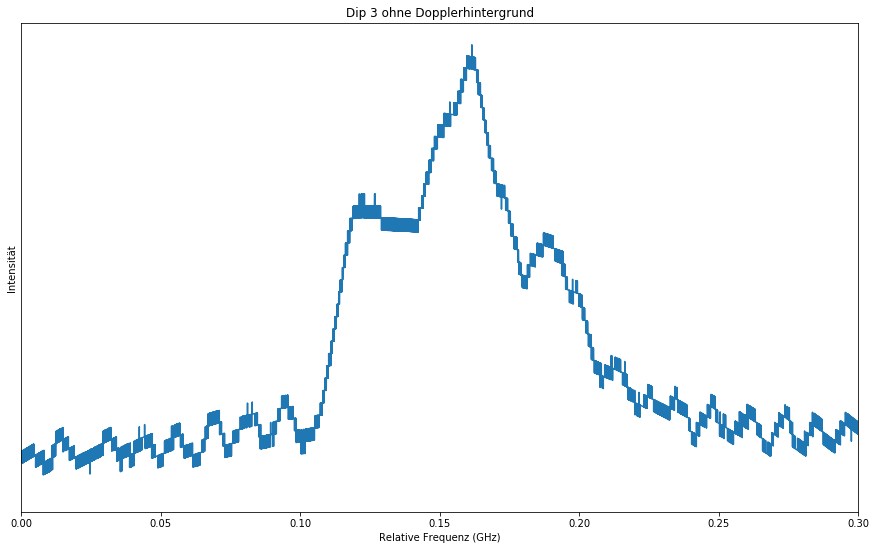

In [190]:
plt.figure(figsize=(15,9))
plt.plot(x3, y3 - gauss(x3, testfitParams3[0], testfitParams3[1], testfitParams3[2], testfitParams3[3]))
plt.title("Dip 3 ohne Dopplerhintergrund")
plt.xlim(0,0.3)
plt.xlabel("Relative Frequenz (GHz)")
plt.ylabel("Intensität")
plt.yticks([])
plt.savefig("Dip3 ohne Doppler.pdf", bbox_inches="tight")

---

### Dip 4

In [191]:
dip4_df = pd.read_csv("Dip4.csv")
dip4_df.head()

,x-axis,1,2,3
0,second,Volt,Volt,Volt
1,-736.00000E-06,-50.23042E-06,+11.78582905605E+00,+42.85427144170E+00
2,-735.96800E-06,+5.97992027E-03,+11.83608031273E+00,+42.85427144170E+00
3,-735.93600E-06,-50.23042E-06,+11.48432151601E+00,+42.85427144170E+00
4,-735.90400E-06,-1.05525553E-03,+11.78582905605E+00,+42.85427144170E+00


In [192]:
dip4_df.columns = ["Zeit (s)", "Referenz (V)", "Piezo (V)", "Strahl (V)"]
dip4_df.drop([0], inplace=True)
dip4_df.reset_index(drop=True, inplace=True)
dip4_df = dip4_df.astype("float")
dip4_df.head()

,Zeit (s),Referenz (V),Piezo (V),Strahl (V)
0,-0.00073600,-0.00005023,11.78582906,42.85427144
1,-0.00073597,0.00597992,11.83608031,42.85427144
2,-0.00073594,-0.00005023,11.48432152,42.85427144
3,-0.00073590,-0.00105526,11.78582906,42.85427144
4,-0.00073587,0.00597992,11.83608031,43.03015084


Text(0.5, 1.0, 'ignorieren')

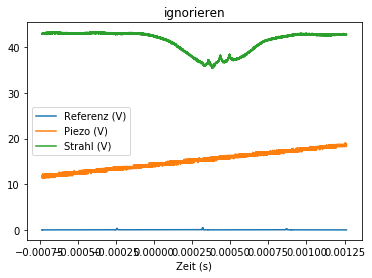

In [193]:
dip4_df.plot(x="Zeit (s)")
plt.title("ignorieren")

[15384 33036 50228]
freier Spektralbereich: 0.75 GHz
zeitlicher Abstand zwischen 2 Peaks: 0.0005575040000000001 s
1 Sekunde entspricht: 1345.281827574331 GHz


Text(0.5, 1.0, 'ignorieren')

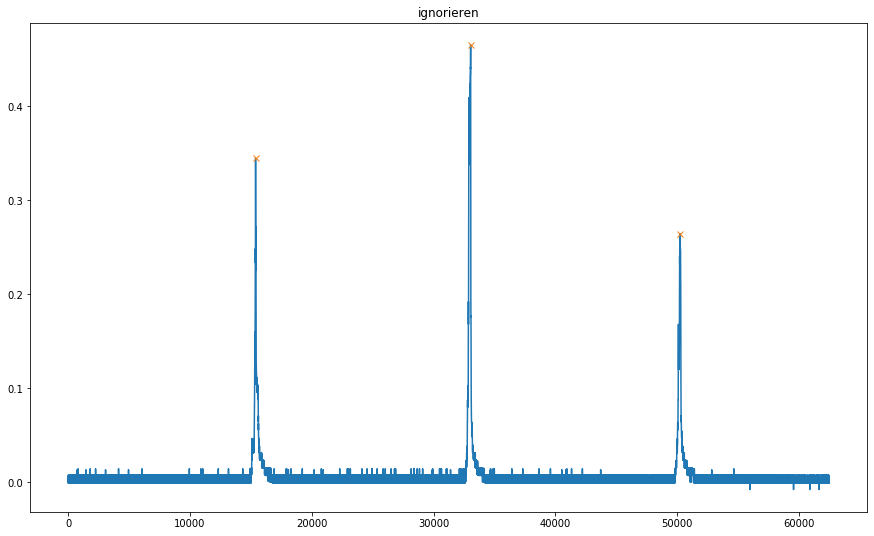

In [194]:
ref4 = dip4_df["Referenz (V)"]
refpeaks4, _ = find_peaks(ref4, height=0.2, distance=1000)
plt.figure(figsize=(15,9))
plt.plot(ref4)
plt.plot(refpeaks4, ref4[refpeaks4], "x")
print(refpeaks4)

# vergangene Zeit zwischen zwei Maxima
delta_t4 = (dip4_df.iloc[refpeaks4[1],0] - dip4_df.iloc[refpeaks4[0],0] + dip4_df.iloc[refpeaks4[2],0] - dip4_df.iloc[refpeaks4[1],0])/2
delta_t4

# Skala berechnen: freier Spektralbereich ny=c/4d
ny_fsr = 3*10**8/(4*0.1)/(10**9) #in GHz
print("freier Spektralbereich:", ny_fsr, "GHz")
print("zeitlicher Abstand zwischen 2 Peaks:", delta_t4, "s")

# Abstand der Zeit entspricht Abstand der Frequenzen: delta_t4 entsprechen 0,75 GHz
print("1 Sekunde entspricht:", ny_fsr/delta_t4, "GHz")
plt.title("ignorieren")

In [195]:
dip4_skal_df = dip4_df.copy()
dip4_skal_df.rename(columns= {"Zeit (s)": "Frequenz (GHz)"}, inplace=True)
dip4_skal_df[["Frequenz (GHz)"]] = dip4_skal_df[["Frequenz (GHz)"]]*ny_fsr/delta_t4
dip4_skal_df

,Frequenz (GHz),Referenz (V),Piezo (V),Strahl (V)
0,-0.99012743,-0.00005023,11.78582906,42.85427144
1,-0.99008438,0.00597992,11.83608031,42.85427144
2,-0.99004133,-0.00005023,11.48432152,42.85427144
3,-0.98999828,-0.00105526,11.78582906,42.85427144
4,-0.98995523,0.00597992,11.83608031,43.03015084
...,...,...,...,...
62495,1.70022098,NaN,NaN,NaN
62496,1.70026403,NaN,NaN,NaN
62497,1.70030708,NaN,NaN,NaN
62498,1.70035013,NaN,NaN,NaN


Text(0, 0.5, 'willkürliche Einheit')

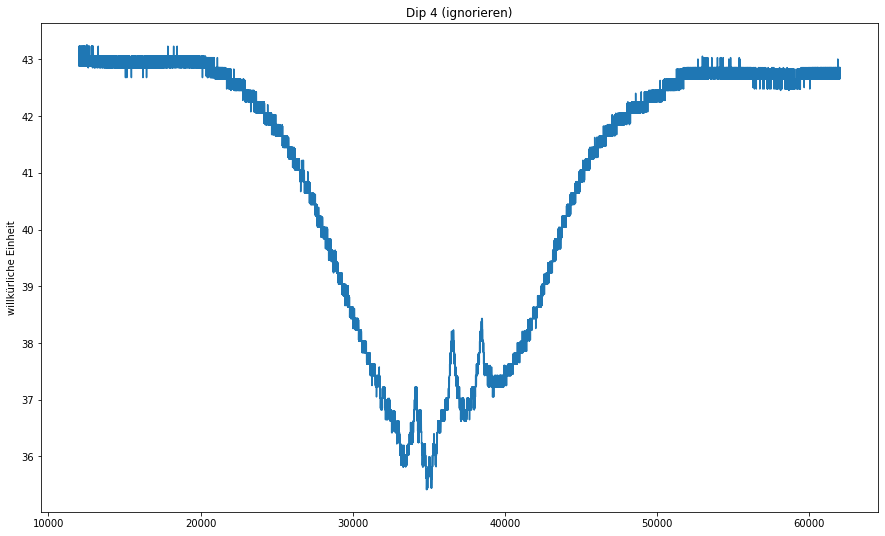

In [196]:
plt.figure(figsize=(15,9))
dip4_skal_df["Strahl (V)"].iloc[12000:62000].plot()
plt.title("Dip 4 (ignorieren)")
plt.ylabel("willkürliche Einheit")

Text(0, 0.5, 'willkürliche Einheit')

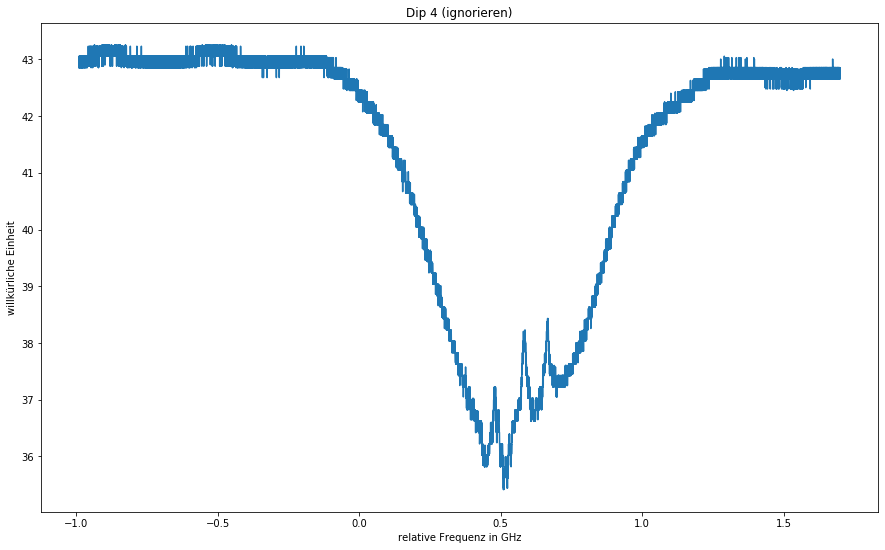

In [197]:
dip4_skal_df.plot(x="Frequenz (GHz)", y="Strahl (V)", figsize=(15,9), legend=None)
plt.title("Dip 4 (ignorieren)")
plt.xlabel("relative Frequenz in GHz")
plt.ylabel("willkürliche Einheit")

In [198]:
x4 = dip4_skal_df["Frequenz (GHz)"].iloc[12000:62000]
y4 = dip4_skal_df["Strahl (V)"].iloc[12000:62000]

#print(x4)
#print(y4)

fit coefficients:
 [43.22905987 -8.          0.54904351  0.59066109]
Covariance matrix:
 [[ 1.64882881e-05 -1.16696197e-05  1.20115481e-10  1.71996567e-06]
 [-1.16696197e-05  5.38537255e-05 -8.55761908e-11  1.02693713e-06]
 [ 1.20115481e-10 -8.55761908e-11  5.97630174e-08  1.24459430e-11]
 [ 1.71996567e-06  1.02693713e-06  1.24459430e-11  5.10814464e-07]]


Text(0.5, 1.0, 'ignorieren')

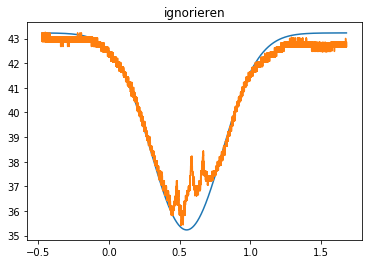

In [199]:
testfitParams4, testfitCovariances4 = curve_fit(gauss, x4, y4, bounds=((40, -10, 0.5, 0.4), (48, -8, 0.7, 0.7)))
print('fit coefficients:\n', testfitParams4)
print('Covariance matrix:\n', testfitCovariances4)

#sigma = [np.sqrt(testfitCovariances4[0,0]), np.sqrt(testfitCovariances4[1,1]), np.sqrt(testfitCovariances4[2,2]), np.sqrt(testfitCovariances4[3,3])]
plt.plot(x4, gauss(x4, testfitParams4[0], testfitParams4[1], testfitParams4[2], testfitParams4[3]))
plt.plot(x4,y4)
plt.title("ignorieren")

fit coefficients:
 [ 4.28440365e+01 -8.00000000e+00  5.59393060e-01  5.61416005e-01
  2.98722997e-02  4.80309064e-01  1.63062442e-02  2.64416599e-01
  5.60000000e-01  2.00000000e-01  1.30945997e-01  5.83323007e-01
  4.33116369e-02  1.75393675e-01  6.70000000e-01  6.51879864e-02]


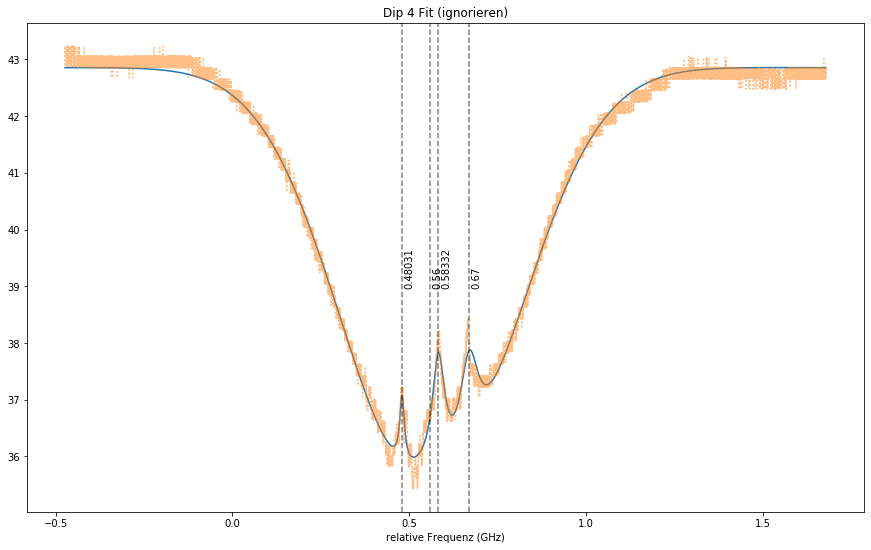

In [200]:
# Dip 4 Fit (ignorieren)

fitParams4, fitCovariances4 = curve_fit(dip4, x4, y4, bounds=((40, -10, 0.5, 0.4, 0, 0.45, 0.01, 0, 0.5, 0.01, 0, 0.57, 0.01, 0, 0.67, 0.01), 
                                                               (48, -8, 0.7, 0.7, 5, 0.50, 0.20, 5, 0.56, 0.20, 5, 0.6, 0.06, 5, 0.72, 0.20)))
print('fit coefficients:\n', fitParams4)
#print('Covariance matrix:\n', fitCovariances4)

plt.figure(figsize=(15,9))
plt.title("Dip 4 Fit (ignorieren)")
plt.plot(x4, dip4(x4, fitParams4[0], fitParams4[1], fitParams4[2], fitParams4[3], fitParams4[4], fitParams4[5], fitParams4[6], fitParams4[7]
                     , fitParams4[8], fitParams4[9], fitParams4[10], fitParams4[11], fitParams4[12], fitParams4[13], fitParams4[14], fitParams4[15]))
plt.plot(x4,y4,":", alpha=0.5)
plt.xlabel("relative Frequenz (GHz)")

xposition = [fitParams4[5],fitParams4[8],fitParams4[11],fitParams4[14]]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
    plt.annotate(round(xc,5), xy=(xc+0.007,39), rotation=90)

fit coefficients:
 [ 4.26569347e+01 -9.53402242e+00  5.44508707e-01  5.73673185e-01
  3.91965921e+00  4.85000000e-01  2.50000000e-01  3.00000000e+00
  2.93033983e-01  5.82146165e-01  2.71738195e-02  2.25254002e+00
  3.34510931e-01  6.65803866e-01  4.02964645e-02  1.92555779e+00]


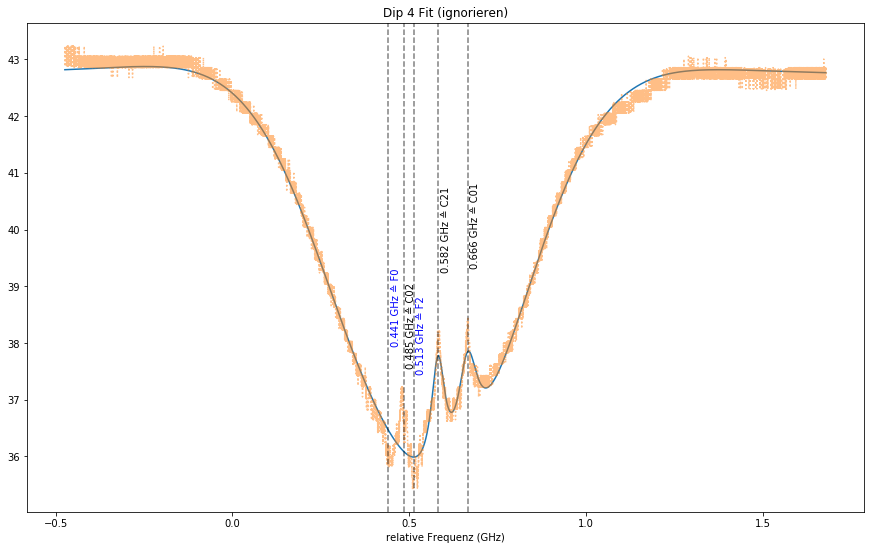

In [201]:
# Dip 4 Fit mit Sättigung 3 Dips (ignorieren)

fitParams4, fitCovariances4 = curve_fit(dip3S, x4, y4, bounds=((40, -10, 0.5, 0.4, 0, 0.48, 0.01, 0, 0, 0.57, 0.01, 0, 0, 0.66, 0.01, 0), 
                                                               (48, -8, 0.7, 0.7, 15, 0.485, 0.25, 3, 5, 0.6, 0.06, 5, 5, 0.7, 0.20, 5)))
print('fit coefficients:\n', fitParams4)
#print('Covariance matrix:\n', fitCovariances4)

plt.figure(figsize=(15,9))
plt.title("Dip 4 Fit (ignorieren)")
plt.plot(x4, dip3S(x4, fitParams4[0], fitParams4[1], fitParams4[2], fitParams4[3], fitParams4[4], fitParams4[5], fitParams4[6], fitParams4[7]
                     , fitParams4[8], fitParams4[9], fitParams4[10], fitParams4[11], fitParams4[12], fitParams4[13], fitParams4[14], fitParams4[15]))
plt.plot(x4,y4,":", alpha=0.5)
plt.xlabel("relative Frequenz (GHz)")

xposition = [0.441, fitParams4[5], 0.513, fitParams4[9], fitParams4[13]]
typ = ["F0", "C02", "F2", "C21", "C01", "F1"]
color = ["b","k","b", "k", "k", "b"]

for xc, t, c in zip(xposition, typ, color):
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
    plt.annotate("%.3f GHz ≙ %s" % (round(xc, 3), t), xy=(xc+0.007, dip3S(xc, fitParams4[0], fitParams4[1], fitParams4[2], fitParams4[3], fitParams4[4], fitParams4[5], fitParams4[6], fitParams4[7]
                     , fitParams4[8], fitParams4[9], fitParams4[10], fitParams4[11], fitParams4[12], fitParams4[13], fitParams4[14], fitParams4[15])+1.5), rotation=90, color=c)

fit coefficients:
 [ 4.25717390e+01 -9.66783008e+00  5.43227159e-01  5.83910242e-01
  5.88703919e+00  4.80000000e-01  2.50000000e-01  4.99999981e+00
  3.39215847e-01  5.30000000e-01  5.35401460e-02  7.92697786e+00
  3.07532392e-01  5.83323410e-01  1.60065822e-02  5.01279650e+00
  4.10484195e-01  6.64851553e-01  3.17660858e-02  3.60099597e+00]
0.3951484474239837
0.43757422371199184


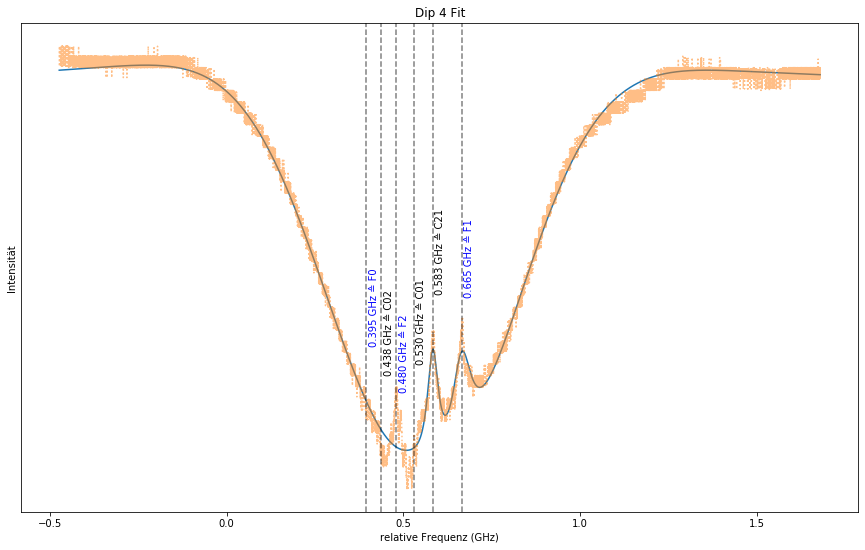

In [202]:
# Dip 4 Fit mit Sättigung 4 Dips

fitParams4, fitCovariances4 = curve_fit(dip4S, x4, y4, bounds=((40, -10, 0.5, 0.4, 0, 0.48, 0.01, 0, 0, 0.53, 0.01, 0, 0, 0.57, 0.01, 0, 0, 0.66, 0.01, 0), 
                                                               (48, -8, 0.7, 0.7, 9, 0.49, 0.25, 5, 9, 0.54, 0.20, 10, 5, 0.6, 0.06, 10, 5, 0.70, 0.20, 10)))
print('fit coefficients:\n', fitParams4)
#print('Covariance matrix:\n', fitCovariances4)

plt.figure(figsize=(15,9))
plt.title("Dip 4 Fit")
plt.plot(x4, dip4S(x4, fitParams4[0], fitParams4[1], fitParams4[2], fitParams4[3], fitParams4[4], fitParams4[5], fitParams4[6], fitParams4[7]
                     , fitParams4[8], fitParams4[9], fitParams4[10], fitParams4[11], fitParams4[12], fitParams4[13], fitParams4[14], fitParams4[15]
                     , fitParams4[16], fitParams4[17], fitParams4[18], fitParams4[19]))
plt.plot(x4,y4,":", alpha=0.5)
plt.xlabel("relative Frequenz (GHz)")
plt.ylabel("Intensität")
plt.yticks([])

dip4_f0 = 2*fitParams4[9]-fitParams4[17]
print(dip4_f0)

dip4_c02 = (dip4_f0 + fitParams4[5])/2
print(dip4_c02)

xposition = [dip4_f0, dip4_c02, fitParams4[5], fitParams4[9], fitParams4[13], fitParams4[17]]
typ = ["F0", "C02", "F2", "C01", "C21", "F1"]
color = ["b", "k", "b","k", "k", "b"]
distance = [1,1,1,1.5,1,1]

for xc, t, c, d in zip(xposition, typ, color, distance):
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
    plt.annotate("%.3f GHz ≙ %s" % (round(xc, 3), t), xy=(xc+0.007, dip4S(xc, fitParams4[0], fitParams4[1], fitParams4[2], fitParams4[3], fitParams4[4], fitParams4[5], fitParams4[6], fitParams4[7]
                     , fitParams4[8], fitParams4[9], fitParams4[10], fitParams4[11], fitParams4[12], fitParams4[13], fitParams4[14], fitParams4[15]
                    , fitParams4[16], fitParams4[17], fitParams4[18], fitParams4[19])+d), rotation=90, color=c)
    
plt.savefig("Dip4.pdf", bbox_inches="tight")

Literatur (Versuchsanleitung S.10):  
F0 -> F2 : 72,218 MHz  
F2 -> F1 : 156,947 MHz  
F0 -> F1: 229,165 MHz  

Werte aus Plot:  
F0 -> F2 : 85 MHz  
F2 -> F1 : 185 MHz  
F0 -> F1: 270 MHz

fit coefficients:
 [ 4.24835384e+01 -9.07655415e+00  5.46993149e-01  6.00287348e-01
  3.66413170e-19  4.44000000e-01  5.99999992e-02  4.99997748e+00
  8.99999990e+00  4.80000000e-01  2.50000000e-01  1.09168403e+01
  2.45102240e-01  5.10000000e-01  6.62711831e-02  3.93536229e+00
  4.12520055e-12  5.32883076e-01  1.77101632e-01  4.22901243e+00
  3.02247912e-01  5.83907231e-01  2.34246937e-02  2.95121661e+00
  2.72403178e-01  6.70000000e-01  3.32962047e-02  2.12965674e+00]


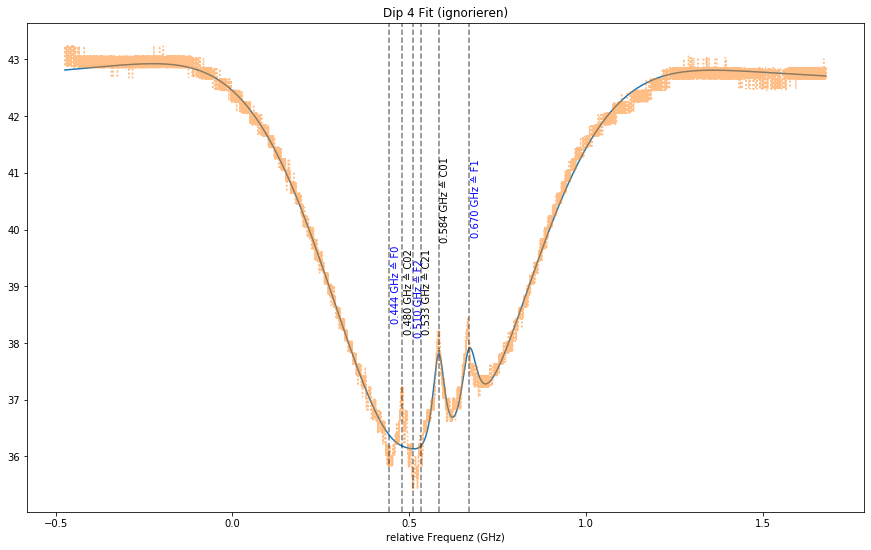

In [203]:
# Dip 4 Fit mit Sättigung 6 Dips (ignorieren)

fitParams4, fitCovariances4 = curve_fit(dip6S, x4, y4, bounds=((40, -10, 0.5, 0.4, 0, 0.438, 0.01, 0, 0, 0.48, 0.01, 0, 0, 0.510, 0.01, 0, 0, 0.53, 0.01, 0, 0, 0.57, 0.01, 0, 0, 0.67, 0.01, 0), 
                                                               (48, -8, 0.7, 0.7, 9, 0.444, 0.06, 5, 9, 0.49, 0.25, 15, 5, 0.516, 0.1, 5, 9, 0.56, 0.20, 5, 5, 0.6, 0.06, 5, 5, 0.72, 0.20, 5)))
print('fit coefficients:\n', fitParams4)
#print('Covariance matrix:\n', fitCovariances4)

plt.figure(figsize=(15,9))
plt.title("Dip 4 Fit (ignorieren)")
plt.plot(x4, dip6S(x4, fitParams4[0], fitParams4[1], fitParams4[2], fitParams4[3], fitParams4[4], fitParams4[5], fitParams4[6], fitParams4[7]
                     , fitParams4[8], fitParams4[9], fitParams4[10], fitParams4[11], fitParams4[12], fitParams4[13], fitParams4[14], fitParams4[15]
                     , fitParams4[16], fitParams4[17], fitParams4[18], fitParams4[19], fitParams4[20], fitParams4[21], fitParams4[22], fitParams4[23]
                  , fitParams4[24], fitParams4[25], fitParams4[26], fitParams4[27]))
plt.plot(x4,y4,":", alpha=0.5)
plt.xlabel("relative Frequenz (GHz)")

xposition = [fitParams4[5], fitParams4[9], fitParams4[13], fitParams4[17], fitParams4[21], fitParams4[25]]
typ = ["F0", "C02", "F2", "C21", "C01", "F1"]
color = ["b","k", "b", "k", "k", "b"]

for xc, t, c in zip(xposition, typ, color):
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
    plt.annotate("%.3f GHz ≙ %s" % (round(xc, 3), t), xy=(xc+0.005, dip6S(xc, fitParams4[0], fitParams4[1], fitParams4[2], fitParams4[3], fitParams4[4], fitParams4[5], fitParams4[6], fitParams4[7]
                     , fitParams4[8], fitParams4[9], fitParams4[10], fitParams4[11], fitParams4[12], fitParams4[13], fitParams4[14], fitParams4[15]
                    , fitParams4[16], fitParams4[17], fitParams4[18], fitParams4[19], fitParams4[20], fitParams4[21], fitParams4[22], fitParams4[23]
                  , fitParams4[24], fitParams4[25], fitParams4[26], fitParams4[27])+2), rotation=90, color=c)

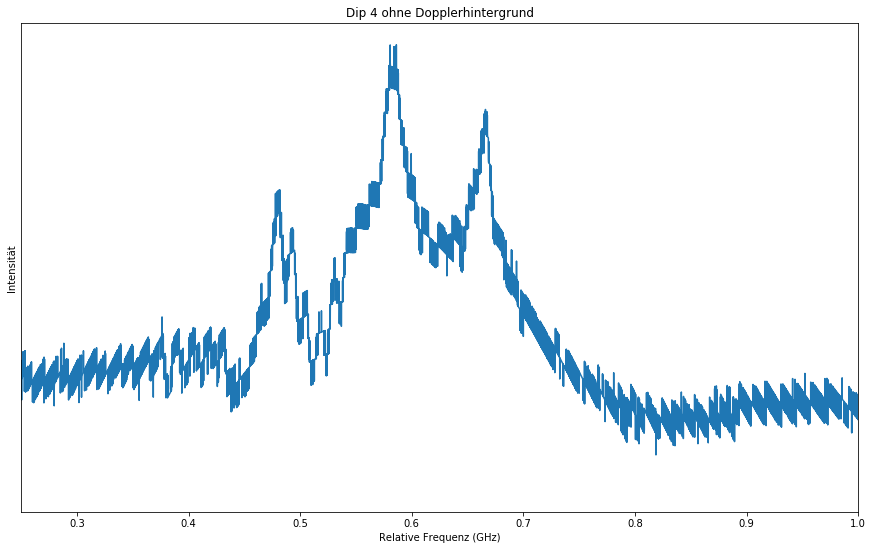

In [204]:
plt.figure(figsize=(15,9))
plt.plot(x4, y4 - gauss(x4, testfitParams4[0], testfitParams4[1], testfitParams4[2], testfitParams4[3]))
plt.title("Dip 4 ohne Dopplerhintergrund")
plt.xlim(0.25,1)
plt.xlabel("Relative Frequenz (GHz)")
plt.ylabel("Intensität")
plt.yticks([])
plt.savefig("Dip4 ohne Doppler.pdf", bbox_inches="tight")

---

---

### Freier Spektralbereich

[  171  2158  8160 12651 17009 20996 24951 28770 32535 36177 39762 43247
 46707 50087 53452 56767 60053]


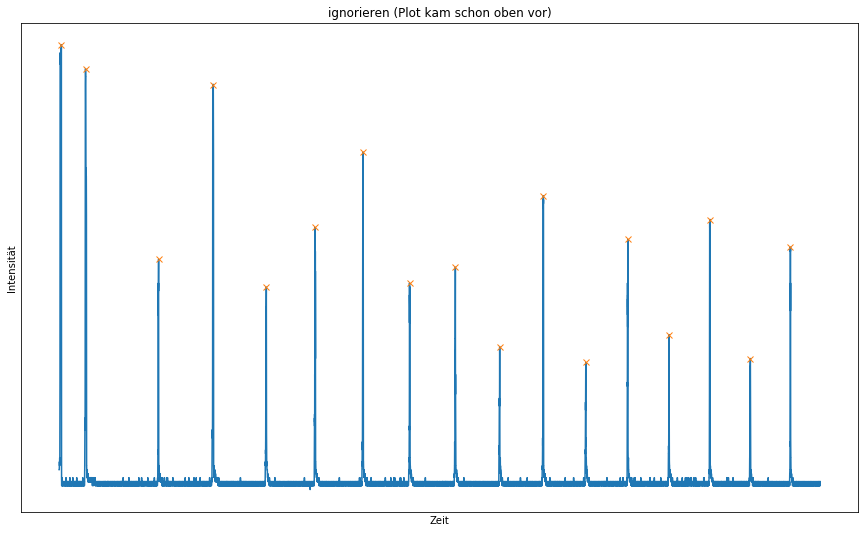

In [205]:
ref = sat_df["Referenz (V)"]
peaks_fsr, _ = find_peaks(ref, height=0.2, distance=1000)
plt.figure(figsize=(15,9))
plt.plot(ref)
plt.plot(peaks_fsr, ref[peaks_fsr], "x")

plt.xlabel("Zeit")
plt.xticks([])

plt.ylabel("Intensität")
plt.yticks([])

plt.title("ignorieren (Plot kam schon oben vor)")

print(peaks_fsr)

In [206]:
#sat_df[["Zeit (s)"]].iloc[peaks_fsr]

In [207]:
delta_t = []
for i in range (16):
    delta_t.append(abs(sat_df[["Zeit (s)"]].iloc[peaks_fsr[i], 0] - sat_df[["Zeit (s)"]].iloc[peaks_fsr[i+1], 0])) 
delta_t

[0.0003179200000000002,
 0.0009603200000000002,
 0.00071856,
 0.0006972800000000002,
 0.0006379199999999997,
 0.0006328,
 0.0006110400000000001,
 0.0006024,
 0.00058272,
 0.0005736,
 0.0005576000000000001,
 0.0005536,
 0.0005407999999999997,
 0.0005384000000000001,
 0.0005303999999999999,
 0.0005257600000000001]

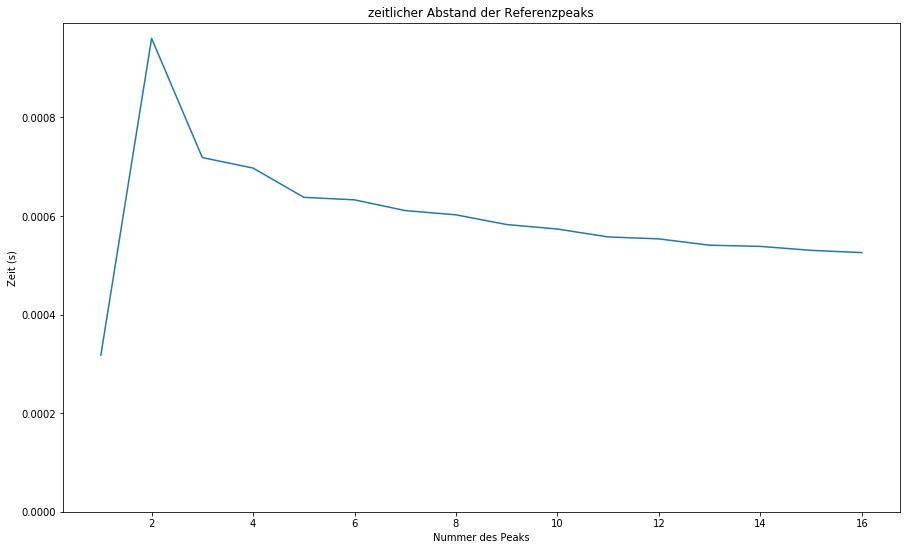

In [208]:
# Abstände der Peaks nehmen im Lauf der Messung ab, die ersten zwei Peaks sind unbrauchbar
#np.linspace
plt.figure(figsize=(15,9))
plt.plot(np.arange(1,17), delta_t)
plt.title("zeitlicher Abstand der Referenzpeaks")
plt.xlabel("Nummer des Peaks")
plt.ylabel("Zeit (s)")
plt.ylim(0)
plt.savefig("Abstand Referenzpeaks.pdf", bbox_inches="tight")

---

---

### Weitere Fragen

In [209]:
# Bestimmung der Temperatur

c = 299792458
k = 1.380649e-23
m85 = 1.40999319910e-25 #https://www.steck.us/alkalidata/rubidium85numbers.pdf S.16
m87 = 1.443160648e-25 #https://www.steck.us/alkalidata/rubidium87numbers.pdf
omega0test = 384*10**12

def temp(delta, m):
    return (delta*10**9*c/omega0test)**2 * m/(8*k*np.log(2))

# Bestimmung der Temperatur der Rubidium Zelle mit Hilfe der FWHM der Gauß-Peaks
print(temp(testfitParams1[3], m87))
print(temp(testfitParams2[3], m85))
print(temp(testfitParams3[3], m85))
print(temp(testfitParams4[3], m87))

print("Durchschnittliche Temperatur (in °C):", (temp(testfitParams1[3], m87)+temp(testfitParams2[3], m85)+temp(testfitParams3[3], m85)+temp(testfitParams4[3], m87))/4 -273.15)

345.4896770283287
625.3622050055598
550.0387980014578
400.84052514465697
Durchschnittliche Temperatur (in °C): 207.2828012950008


In [210]:
# Bestimmung der Verteilung der Isotope
# Amplituden der Gauß Fits
print(testfitParams1[1])
print(testfitParams2[1])
print(testfitParams3[1])
print(testfitParams4[1])

# Anteil von Rb 87 an der Probe: 31%
print((abs(testfitParams1[1])+abs(testfitParams4[1]))/(abs(testfitParams1[1])+abs(testfitParams2[1])+abs(testfitParams3[1])+abs(testfitParams4[1])))

-16.401826814604156
-32.69381392537327
-21.480074995819155
-8.000000000000002
0.31055175999481816


### Tests

In [211]:
#test = np.linspace(-5,5)
#plt.plot(test, gauss(test,0,1,1,0.5))
#plt.plot(test, lorentz(test,1,1,0.2))